## Import Modules, Load Data and Data Review

In [1]:
#First, importing the neccesary libaries, such as numpy, pandas
import pandas as pd
import numpy as np

#Importing the plotting libraries, such as matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the scaling libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#Importing the evaluation libraries, such as mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Importing the train_test_split to split the data
from sklearn.model_selection import train_test_split

from scipy.stats import skew

#Importing the cross validation
from sklearn.model_selection import cross_validate

#Importing make_column_transformer for tranforming
from sklearn.compose import make_column_transformer

#Importing OneHotEncoder, OrdinalEncoder to use them on the object data
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

#Importing ResidualsPlot
from yellowbrick.regressor import ResidualsPlot

#Importing PredictionError
from yellowbrick.regressor import PredictionError

#Importing RadViz
from yellowbrick.features import RadViz

#Importing LinearRegression model
from sklearn.linear_model import LinearRegression

#Importing Ridge model
from sklearn.linear_model import Ridge

#Importing GridSearchCV to find the best result from the hyperparameters
from sklearn.model_selection import GridSearchCV

#Importing ValidationCurve
from yellowbrick.model_selection import ValidationCurve

#Importing Lasso model
from sklearn.linear_model import Lasso

#Importing ElasticNet
from sklearn.linear_model import ElasticNet

#Importing 

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (14,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
#The test size
t = 0.2
#The random value
s = 42

In [3]:
#Reading the dataset from a csv file
df = pd.read_csv("final_scout_not_dummy.csv")

#Seeing the head of the data set
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [4]:
#Seeing the shape of the data set
df.shape
#As we can see, the shape of the data set is (15915, 23)

(15915, 23)

In [5]:
#Seeing the info of the data set
df.info()
#We can see that, there are about 15915 entries. 23 columns, float64(8), int64(2), object(13).
#There is no null data as well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [6]:
#Seeing the description of the dataset
df.describe().T
#We can see that the mean anst std for age, Inspection_new, and Previous_Owners are nearly close to each other

,count,mean,std,min,25%,50%,75%,max
price,15915.000,18024.381,7381.679,4950.000,12850.000,16900.000,21900.000,74600.000
km,15915.000,32089.996,36977.215,0.000,1920.500,20413.000,46900.000,317000.000
Gears,15915.000,5.937,0.705,5.000,5.000,6.000,6.000,8.000
age,15915.000,1.390,1.121,0.000,0.000,1.000,2.000,3.000
Previous_Owners,15915.000,1.043,0.339,0.000,1.000,1.000,1.000,4.000
hp_kW,15915.000,88.499,26.674,40.000,66.000,85.000,103.000,294.000
Inspection_new,15915.000,0.247,0.431,0.000,0.000,0.000,0.000,1.000
Displacement_cc,15915.000,1428.662,275.804,890.000,1229.000,1461.000,1598.000,2967.000
Weight_kg,15915.000,1337.701,199.682,840.000,1165.000,1295.000,1472.000,2471.000
cons_comb,15915.000,4.832,0.868,3.000,4.100,4.800,5.400,9.100


In [7]:
#Checking the duplicated values
df.duplicated().sum()
#As we can see, there are about 1673 duplicated values

1673

In [8]:
#Dropping the duplicated values
df.drop_duplicates(inplace=True)

In [9]:
#Checking the duplicated values after dropping
df.duplicated().sum()
#As we can see, now we have 0 duplicated values

0

In [10]:
#Checking the null values in the data set
df.isnull().sum()
#As we can see, we do not have null values

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

In [11]:
#Seeing the columns of the data set
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

## EDA

### make_model

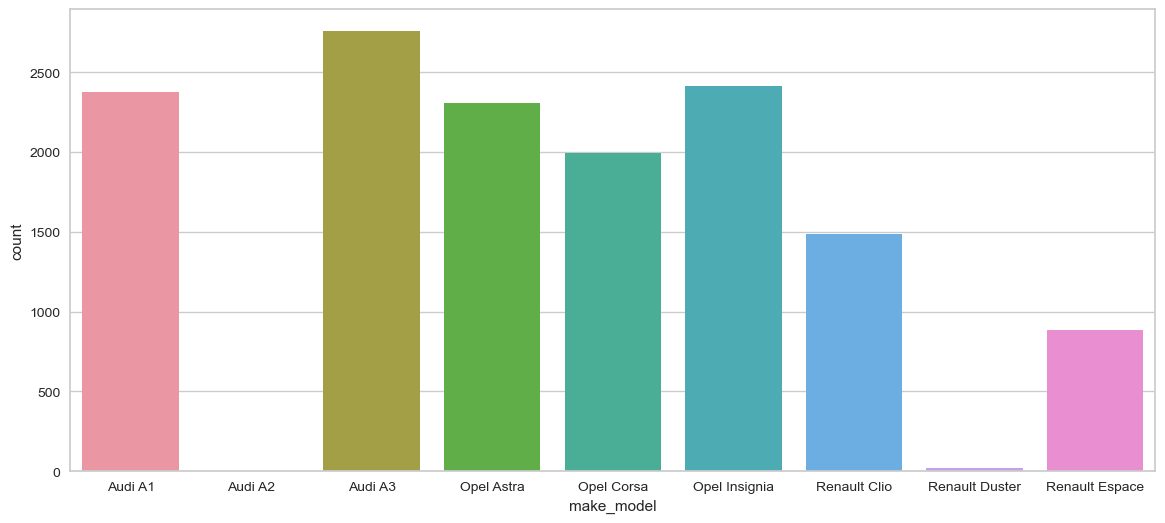

In [12]:
#Seeing the countplot of make_model
sns.countplot(x=df["make_model"])
plt.show()
#As we can see from the graph, we have 9 classes, for Audi A3 and Renault Duster, they are not high at all, and there values
#are so small compared to the others

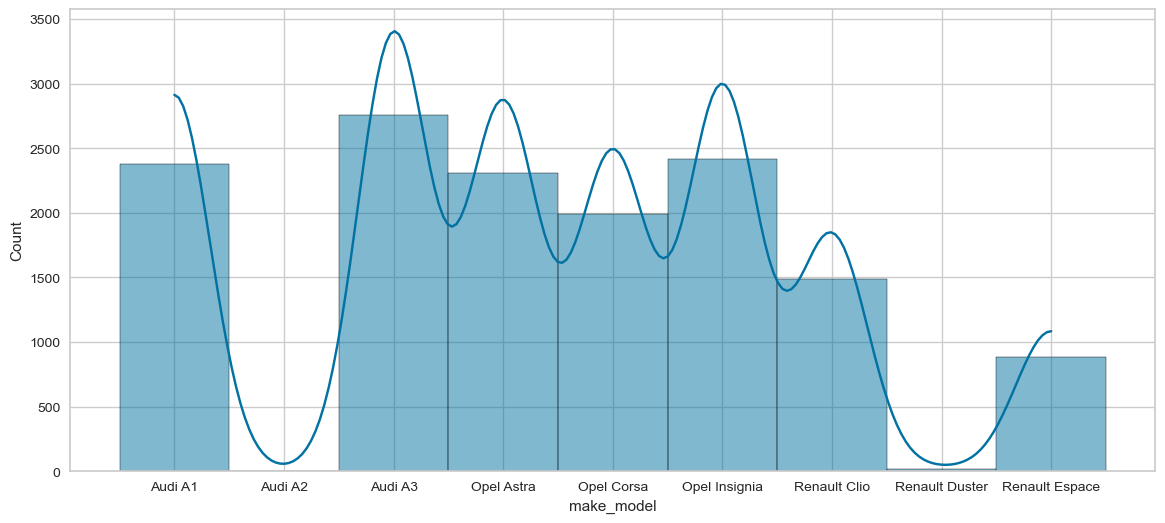

In [13]:
#Seeing the histplot of make_model
sns.histplot(df["make_model"], kde=True)
plt.show()
#We can see the same here as well, the values of Audi A3 and Renault Duster are so small

In [14]:
#Seeing the value counts of make_model
df.make_model.value_counts()
#As we can see, there are some of them have low values, so i am going to drop them (Audi A3 and Renault Duster)

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: count, dtype: int64

In [15]:
#Making a variable to see the classes that have less than 100, as it may affect the model
low = df.make_model.value_counts()[df.make_model.value_counts() <= 100].index
low

Index(['Renault Duster', 'Audi A2'], dtype='object', name='make_model')

In [16]:
#Dropping the low values of make_model
for i in low:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)

df.reset_index(drop=True, inplace=True)

In [17]:
#Seeing the value counts of make_model after dropping
df.make_model.value_counts()
#As we can see, now we do not have classes with less than 100

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Name: count, dtype: int64

### body_type

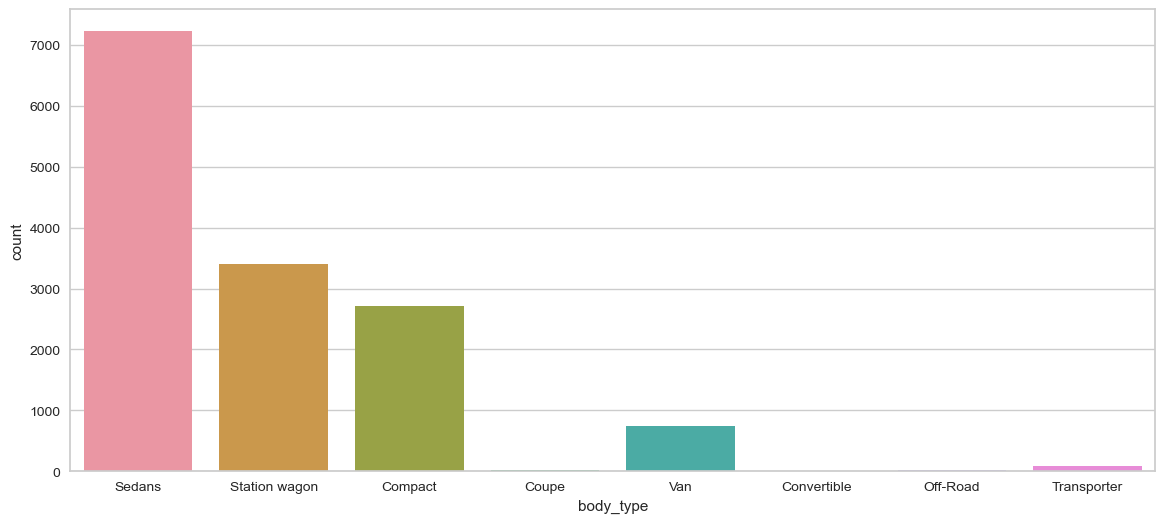

In [18]:
#Seeing the countplot of body_type
sns.countplot(x=df["body_type"])
plt.show()
#As we can see from the graph, we have 8 classes, for coupe, Off-Road, convertible, and Transporter, we can see that they 
#have tiny values.

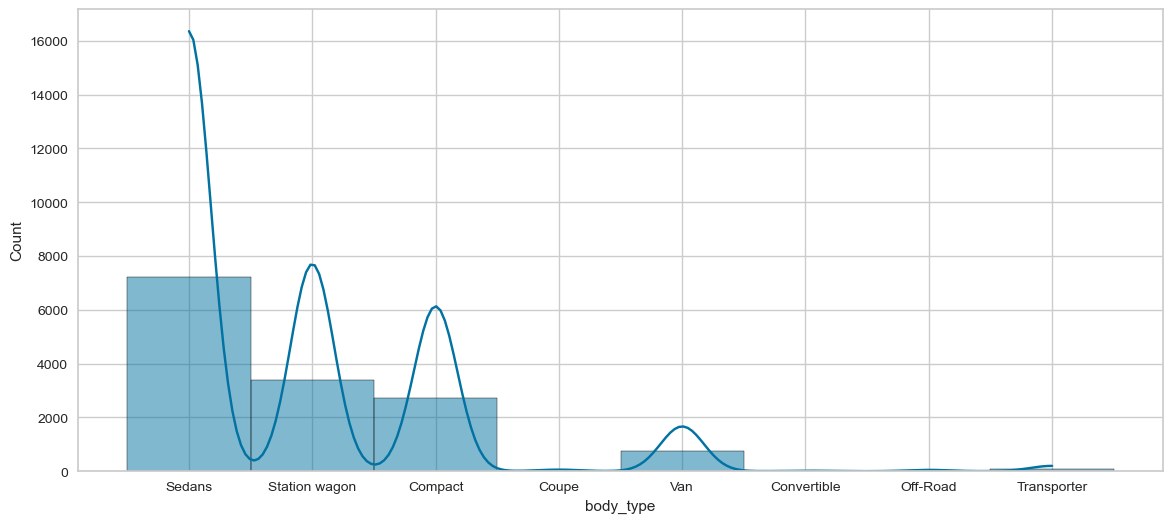

In [19]:
#Seeing the histplot of body_type
sns.histplot(df["body_type"], kde=True)
plt.show()
#We can see the same here as well, for coupe, Off-Road, convertible, and Transporter, we can see that they 
#have tiny values.

In [20]:
#Seeing the value counts of body_type
df.body_type.value_counts()

body_type
Sedans           7230
Station wagon    3405
Compact          2710
Van               735
Transporter        87
Coupe              25
Off-Road           21
Convertible         8
Name: count, dtype: int64

### price

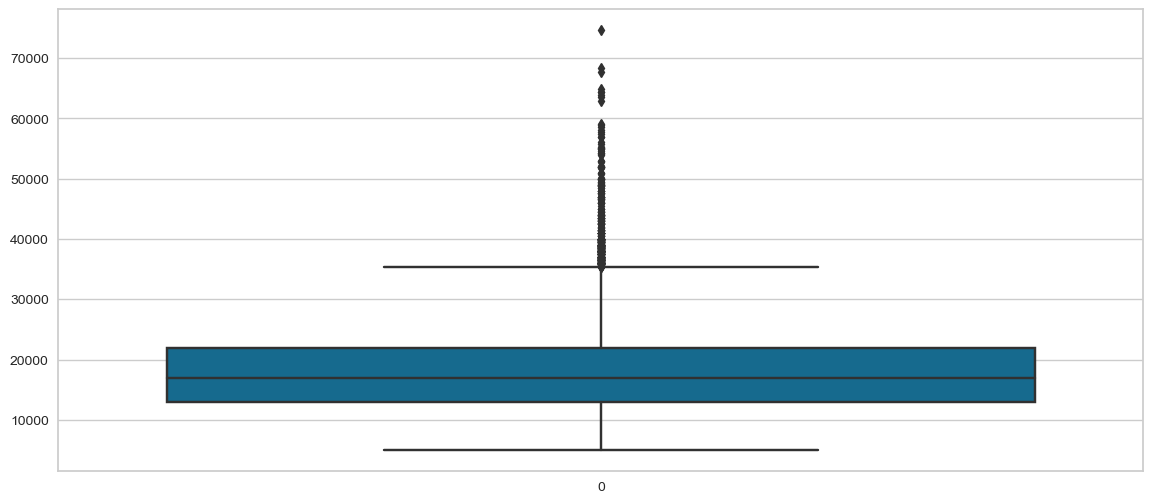

In [21]:
#SEeing teh boxplot of price
sns.boxplot(df['price'])
plt.show()
#As we can see, there are some outliers in price, i am going to drop them in the feature engineering part

In [22]:
#Seeing the value counts of price
df.price.value_counts()

price
14990    124
15990    121
15900    105
17990    100
10990     92
        ... 
20860      1
21005      1
21334      1
21360      1
39875      1
Name: count, Length: 2948, dtype: int64

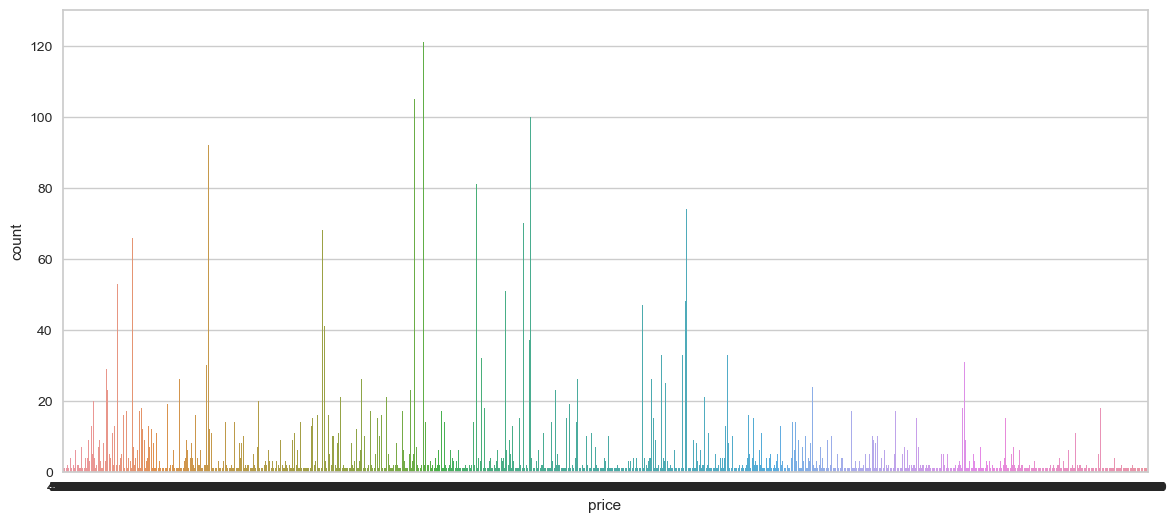

In [23]:
#Seeing the countplot of price
sns.countplot(x=df["price"])
plt.show()
#As we can see from the graph, there are a lot of values. So, it is not shown very well in this countplot

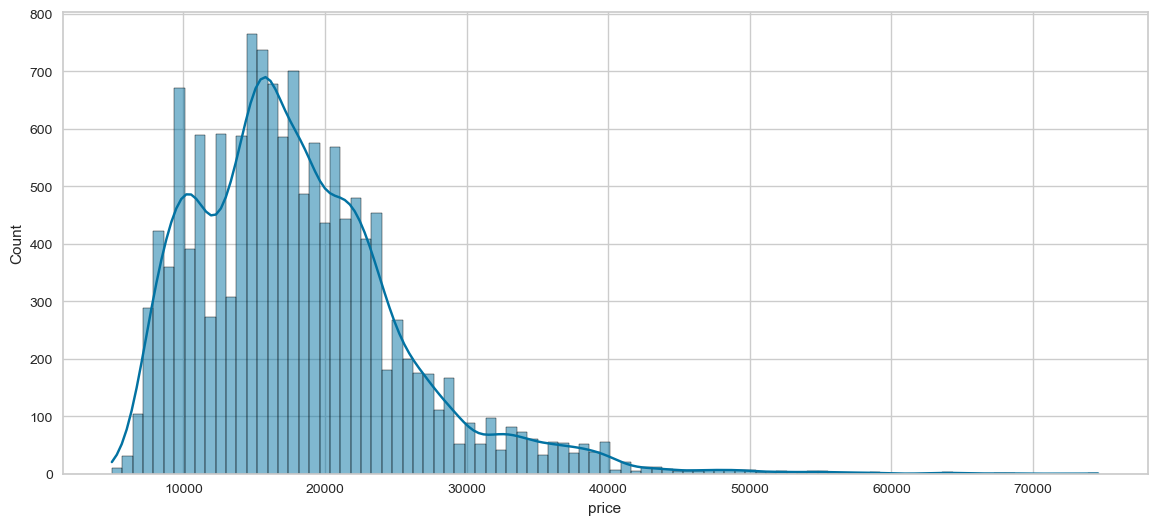

In [24]:
#Seeing the histplot of price
sns.histplot(df["price"], kde=True)
plt.show()
#As we can see, there are low values from about 40000 to 70000

### vat

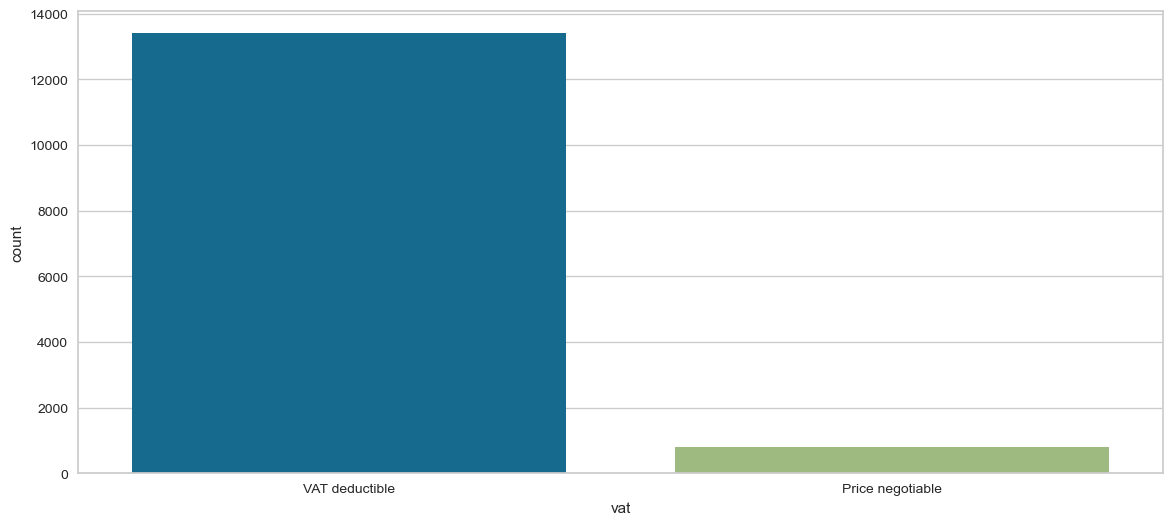

In [25]:
#Seeing the countplot of vat
sns.countplot(x=df["vat"])
plt.show()
#As we can see from the graph, there are two classes, but VAT deductible is more than Price negotiable

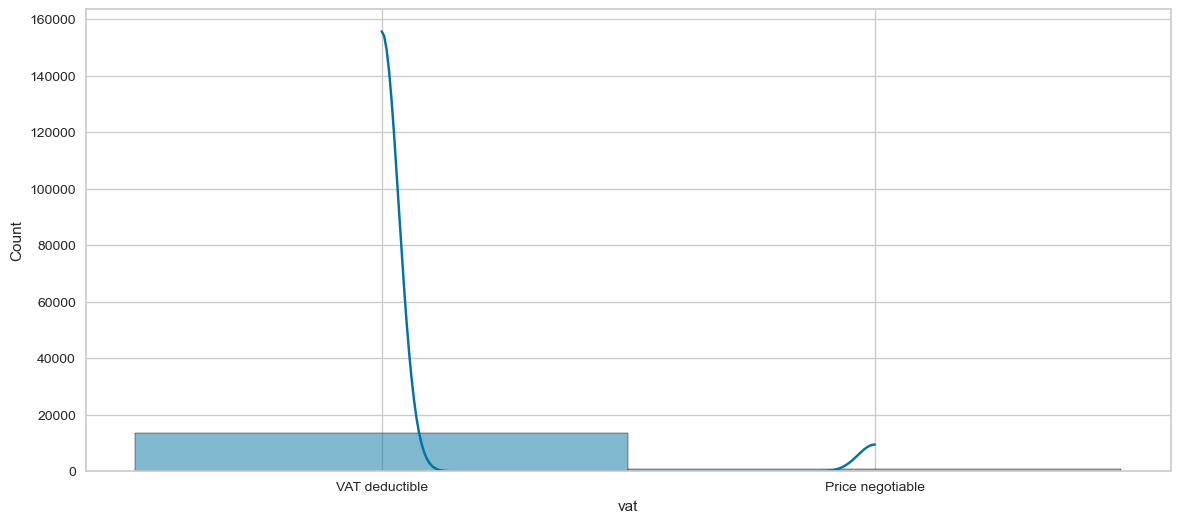

In [26]:
#Seeing the histplot of vat
sns.histplot(df["vat"], kde=True)
plt.show()

In [27]:
#Seeing the value counts of price
df.vat.value_counts()
#We can see from here that VAT deductible has about 13405 and this is more that Price negotiable

vat
VAT deductible      13405
Price negotiable      816
Name: count, dtype: int64

### km

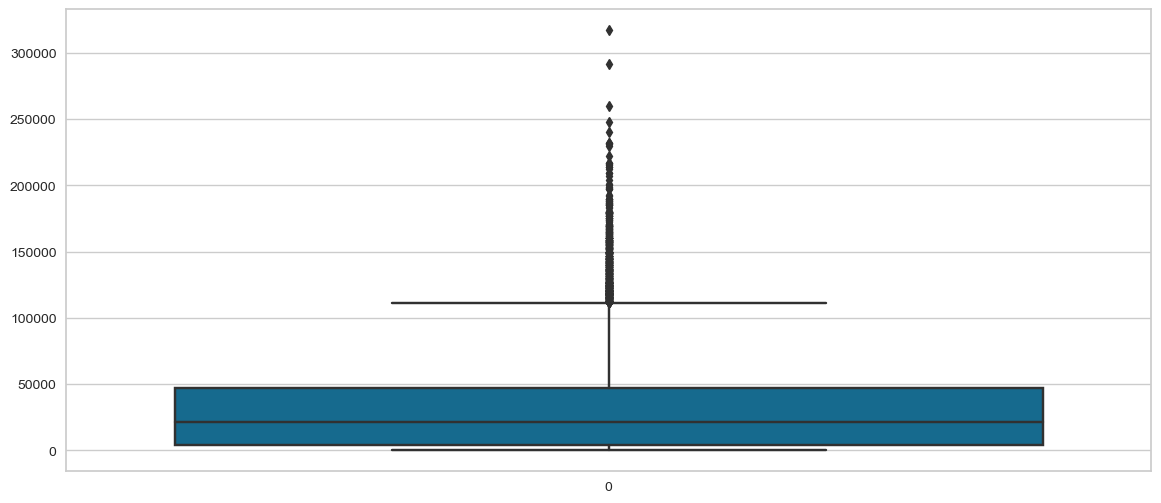

In [28]:
#SEeing teh boxplot of km
sns.boxplot(df['km'])
plt.show()
#As we can see, there are some outliers in km

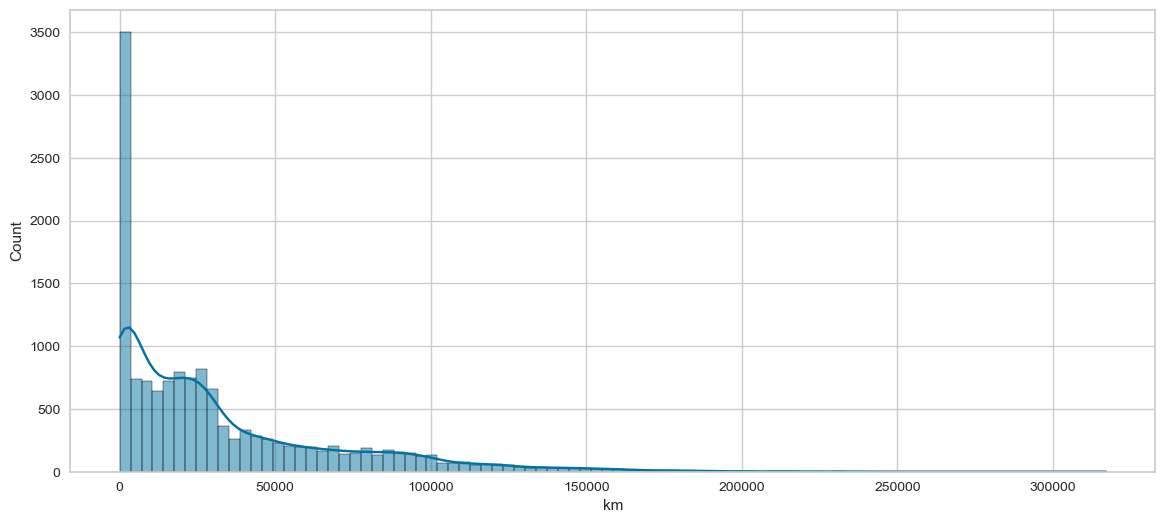

In [29]:
#Seeing the histplot of km
sns.histplot(df["km"], kde=True)
plt.show()

### Type

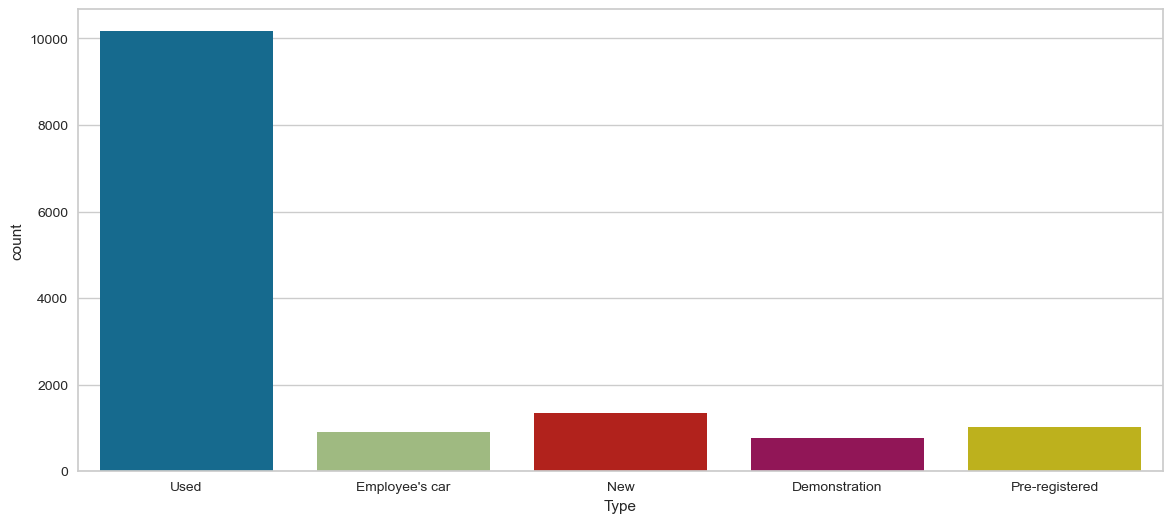

In [30]:
#Seeing the countplot of Type
sns.countplot(x=df["Type"])
plt.show()
#As we can see from the graph, there are 5 classes, and Used has the highest value comapred with the others

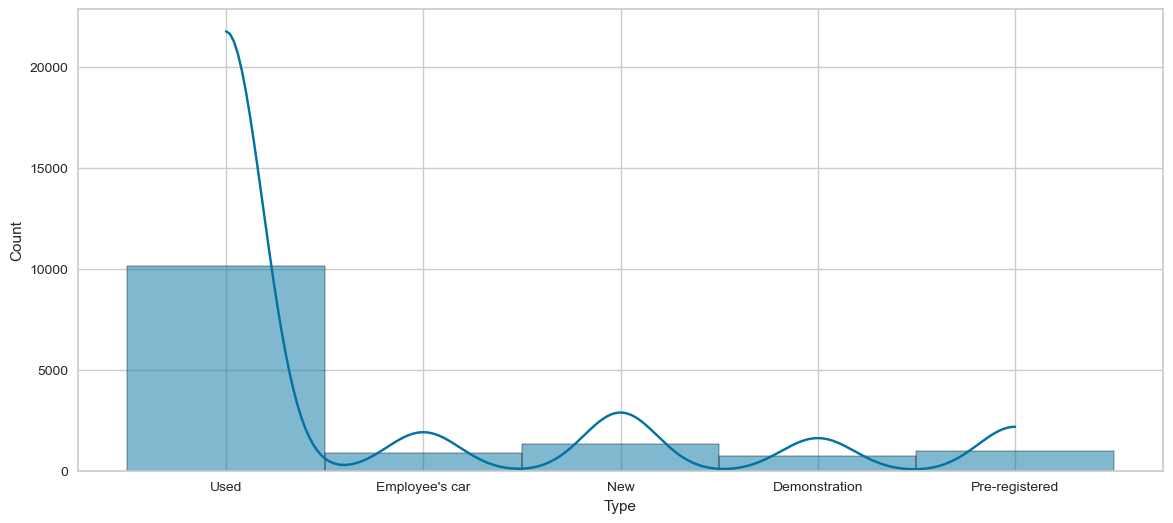

In [31]:
#Seeing the histplot of Type
sns.histplot(df["Type"], kde=True)
plt.show()

### Fuel

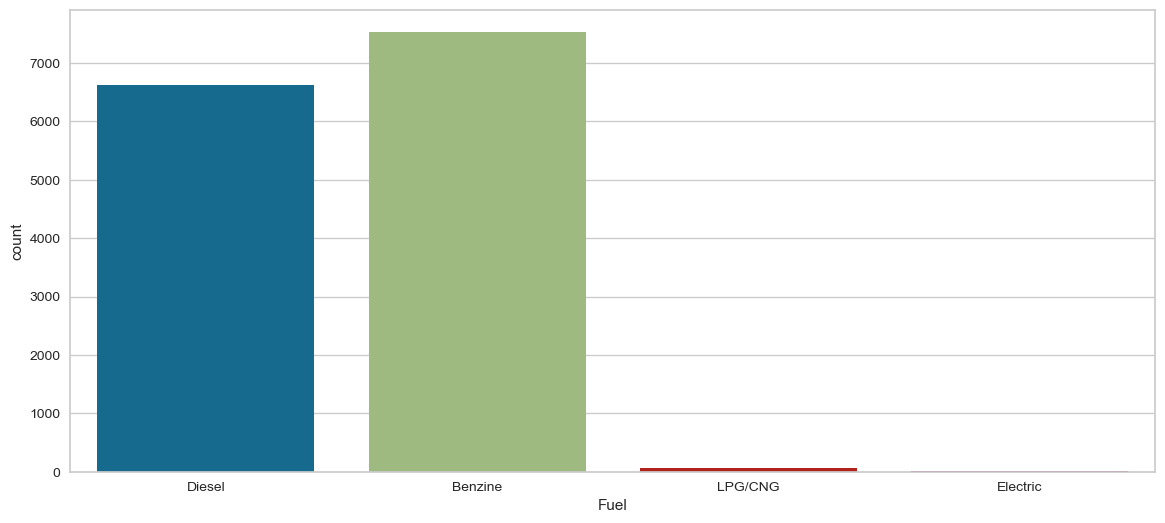

In [32]:
#Seeing the countplot of Fuel
sns.countplot(x=df["Fuel"])
plt.show()
#As we can see from the graph, there are 4 classes, the most used ones are Diesel and Benzine

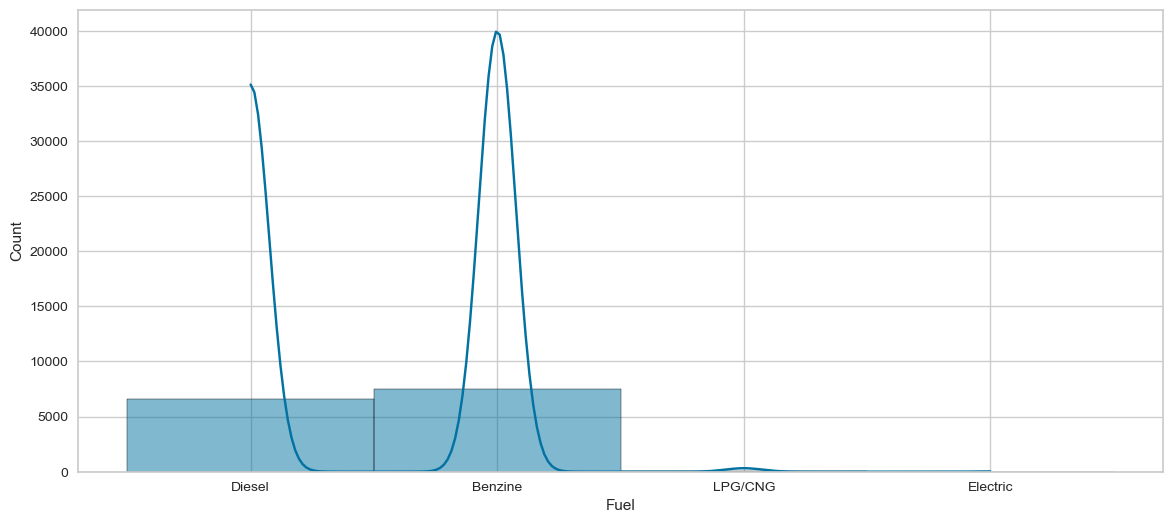

In [33]:
#Seeing the histplot of Fuel
sns.histplot(df["Fuel"], kde=True)
plt.show()

### Gears

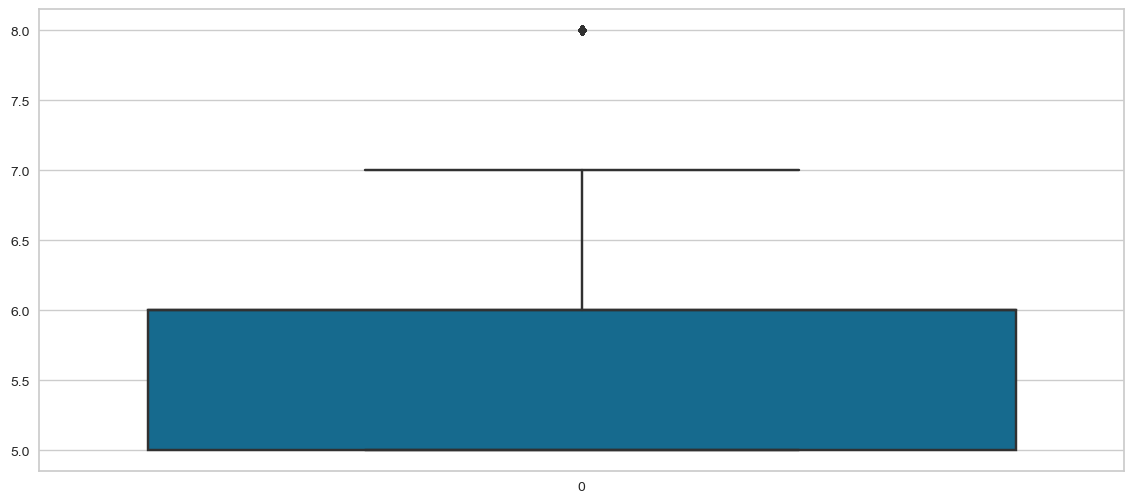

In [34]:
#SEeing teh boxplot of Gears
sns.boxplot(df['Gears'])
plt.show()
#As we can see, there are some outliers in Gears

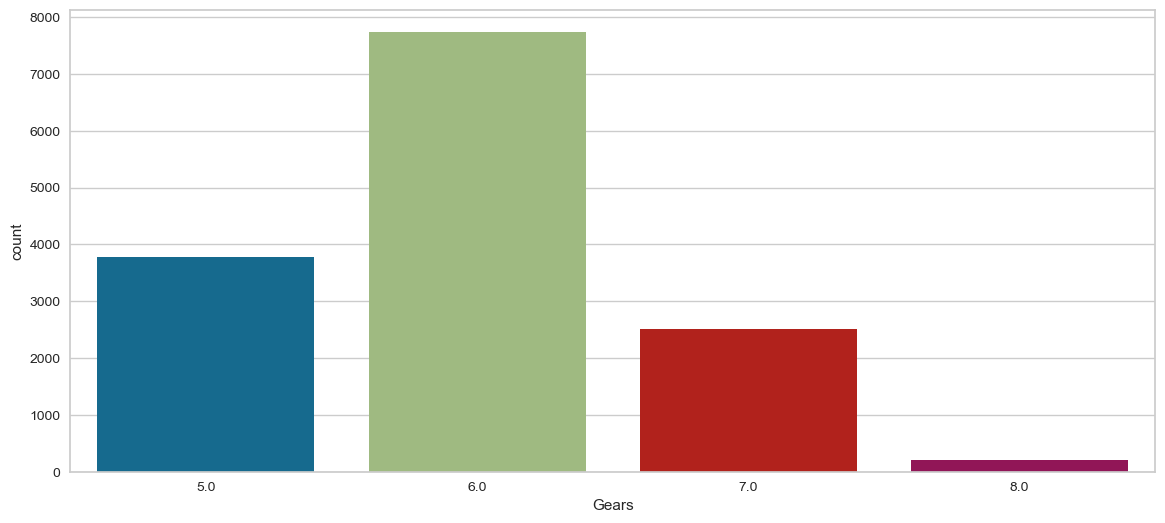

In [35]:
#Seeing the countplot of Gears
sns.countplot(x=df["Gears"])
plt.show()
#As we can see from the graph, there are 4 classes, the most used ones is 6.0, but 8.0 is not used so much

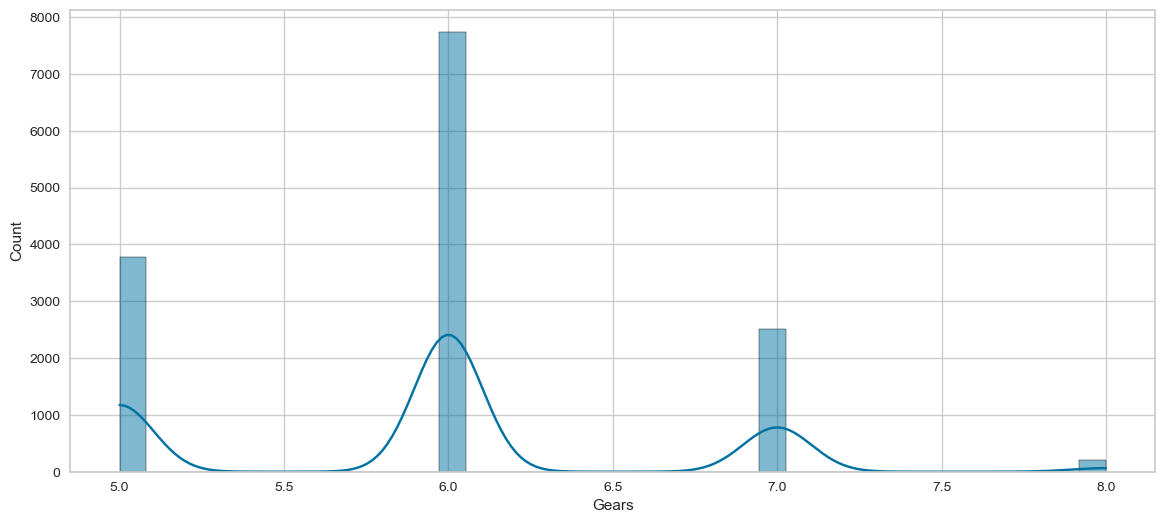

In [36]:
#Seeing the histplot of Gears
sns.histplot(df["Gears"], kde=True)
plt.show()

### Comfort_Convenience 

In [37]:
#Seeing the Comfort_Convenience
df["Comfort_Convenience"]
#As we can see, this is not good for plotting, so i am not going to plot this one

0        Air conditioning,Armrest,Automatic climate con...
1        Air conditioning,Automatic climate control,Hil...
2        Air conditioning,Cruise control,Electrical sid...
3        Air suspension,Armrest,Auxiliary heating,Elect...
4        Air conditioning,Armrest,Automatic climate con...
                               ...                        
14216    Air conditioning,Armrest,Automatic climate con...
14217    Air conditioning,Automatic climate control,Cru...
14218    Air conditioning,Armrest,Automatic climate con...
14219    Air conditioning,Automatic climate control,Cru...
14220    Air conditioning,Armrest,Automatic climate con...
Name: Comfort_Convenience, Length: 14221, dtype: object

### Entertainment_Media

In [38]:
#Seeing Entertainment_Media
df["Entertainment_Media"]
#As we can see, this is not good for plotting, so i am not going to plot this one

0        Bluetooth,Hands-free equipment,On-board comput...
1        Bluetooth,Hands-free equipment,On-board comput...
2                                    MP3,On-board computer
3        Bluetooth,CD player,Hands-free equipment,MP3,O...
4        Bluetooth,CD player,Hands-free equipment,MP3,O...
                               ...                        
14216    Bluetooth,Digital radio,Hands-free equipment,O...
14217    Bluetooth,Digital radio,Hands-free equipment,O...
14218    Bluetooth,Digital radio,Hands-free equipment,M...
14219    Bluetooth,Digital radio,Hands-free equipment,R...
14220    Bluetooth,Hands-free equipment,On-board comput...
Name: Entertainment_Media, Length: 14221, dtype: object

###  Extras

In [39]:
#Seeing Extras
df["Extras"]
#As we can see, this is not good for plotting, so i am not going to plot this one

0           Alloy wheels,Catalytic Converter,Voice Control
1        Alloy wheels,Sport seats,Sport suspension,Voic...
2                               Alloy wheels,Voice Control
3                   Alloy wheels,Sport seats,Voice Control
4        Alloy wheels,Sport package,Sport suspension,Vo...
                               ...                        
14216              Alloy wheels,Touch screen,Voice Control
14217                            Alloy wheels,Touch screen
14218    Alloy wheels,Catalytic Converter,Sport suspens...
14219              Alloy wheels,Touch screen,Voice Control
14220                                         Alloy wheels
Name: Extras, Length: 14221, dtype: object

### Safety_Security 

In [40]:
#Seeing Safety_Security
df["Safety_Security"]
#As we can see, this is not good for plotting, so i am not going to plot this one

0        ABS,Central door lock,Daytime running lights,D...
1        ABS,Central door lock,Central door lock with r...
2        ABS,Central door lock,Daytime running lights,D...
3        ABS,Alarm system,Central door lock with remote...
4        ABS,Central door lock,Driver-side airbag,Elect...
                               ...                        
14216    ABS,Adaptive Cruise Control,Central door lock,...
14217    ABS,Central door lock,Central door lock with r...
14218    ABS,Adaptive Cruise Control,Blind spot monitor...
14219    ABS,Adaptive Cruise Control,Blind spot monitor...
14220    ABS,Adaptive Cruise Control,Blind spot monitor...
Name: Safety_Security, Length: 14221, dtype: object

### age 

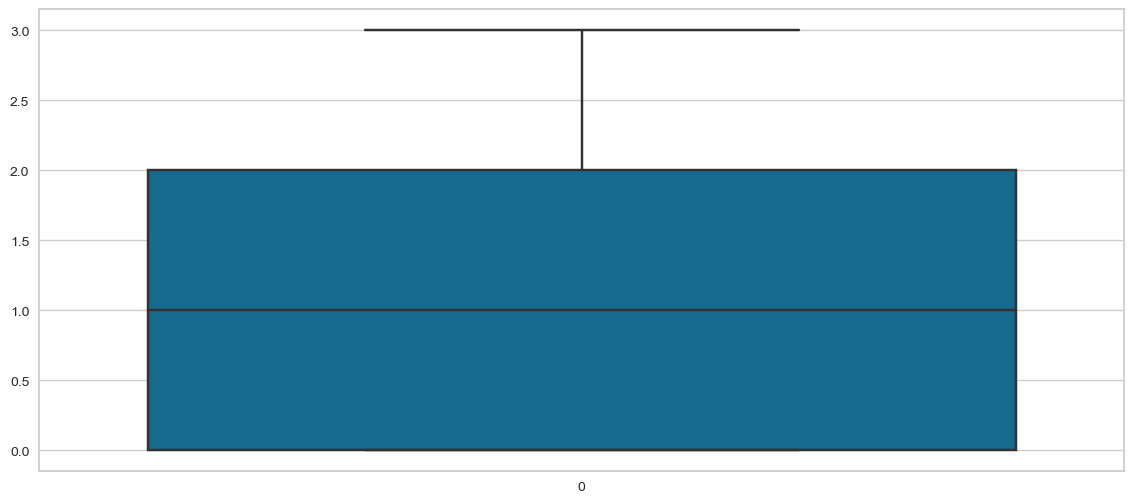

In [41]:
#Seeing teh boxplot of age
sns.boxplot(df['age'])
plt.show()
#As we can see, there is no outliers

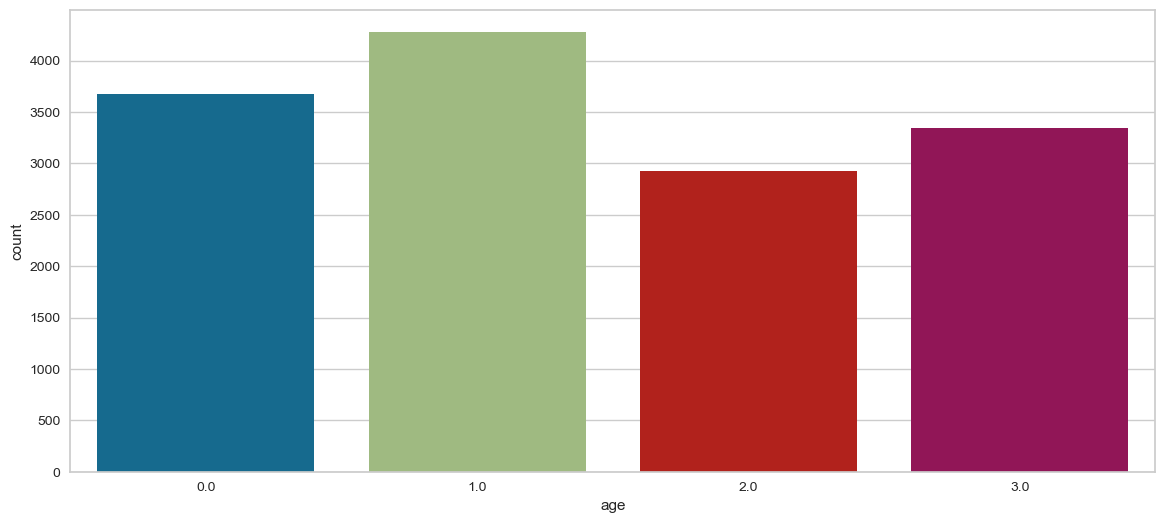

In [42]:
#Seeing the countplot of age
sns.countplot(x=df["age"])
plt.show()
#As we can see from the graph, there are 4 classes and class one is the highest

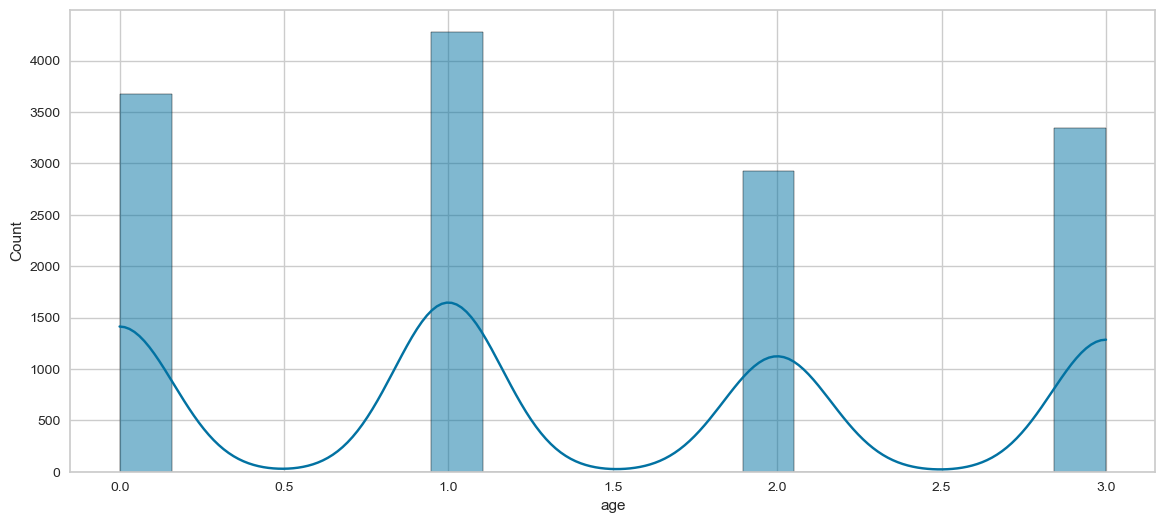

In [43]:
#Seeing the histplot of age
sns.histplot(df["age"], kde=True)
plt.show()

### Previous_Owners 

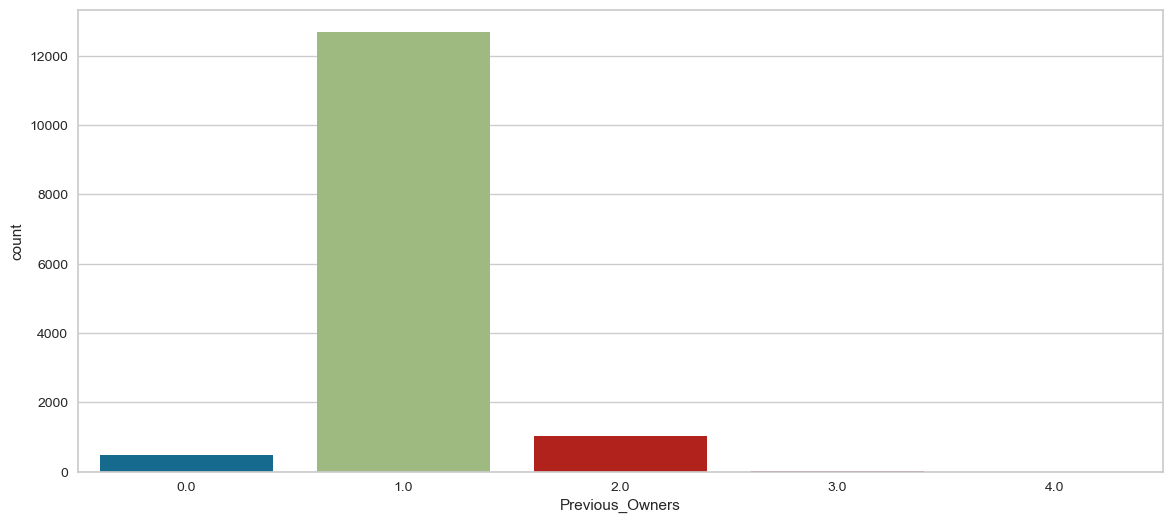

In [44]:
#Seeing the countplot of Previous_Owners
sns.countplot(x=df["Previous_Owners"])
plt.show()
#As we can see from the graph, there are 5 classes, class 1 is the highest compared with the tiny values of the others

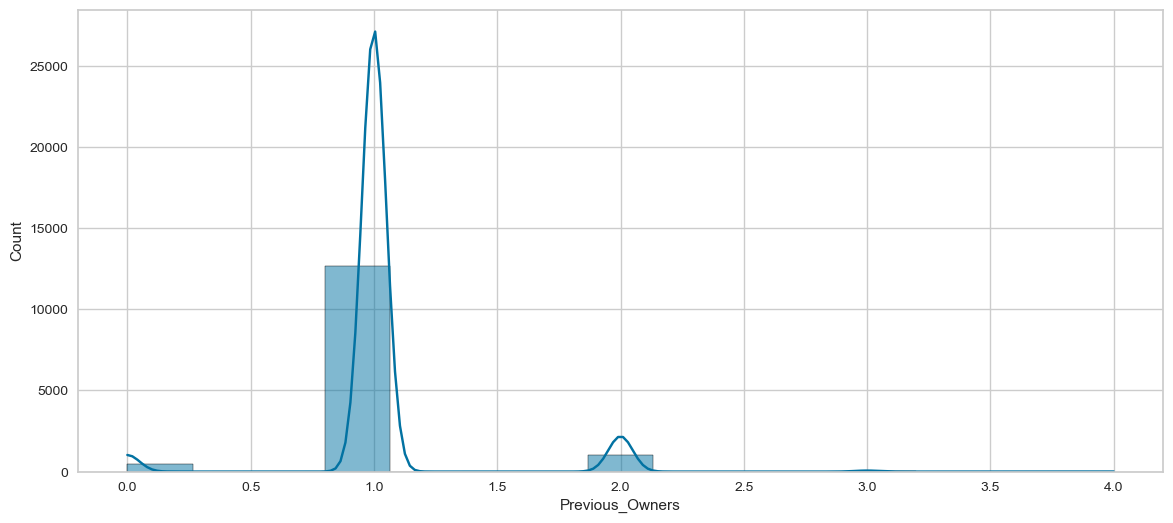

In [45]:
#Seeing the histplot of Previous_Owners
sns.histplot(df["Previous_Owners"], kde=True)
plt.show()

### hp_kW 

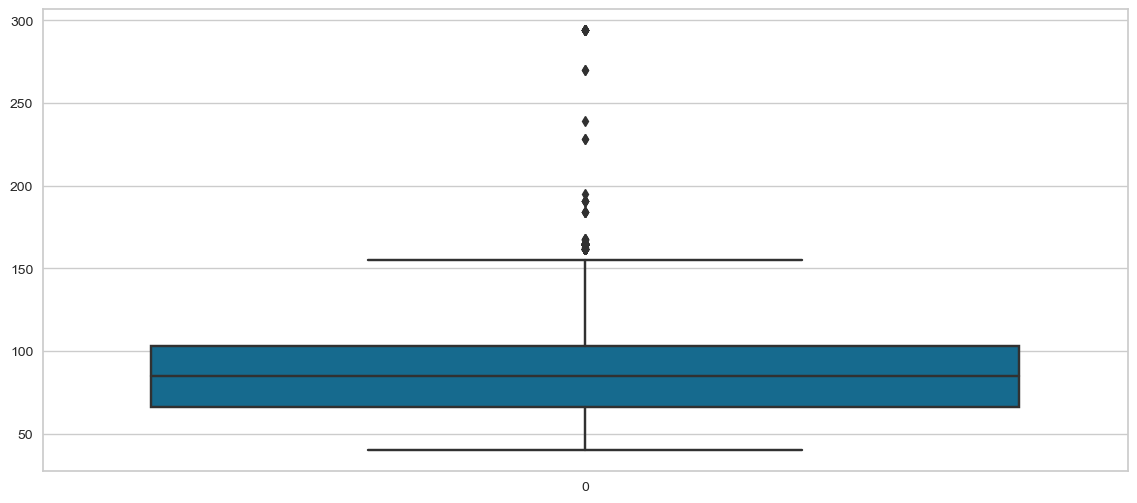

In [46]:
#SEeing teh boxplot of hp_kW
sns.boxplot(df['hp_kW'])
plt.show()
#As we can see, there are some outliers in hp_kW

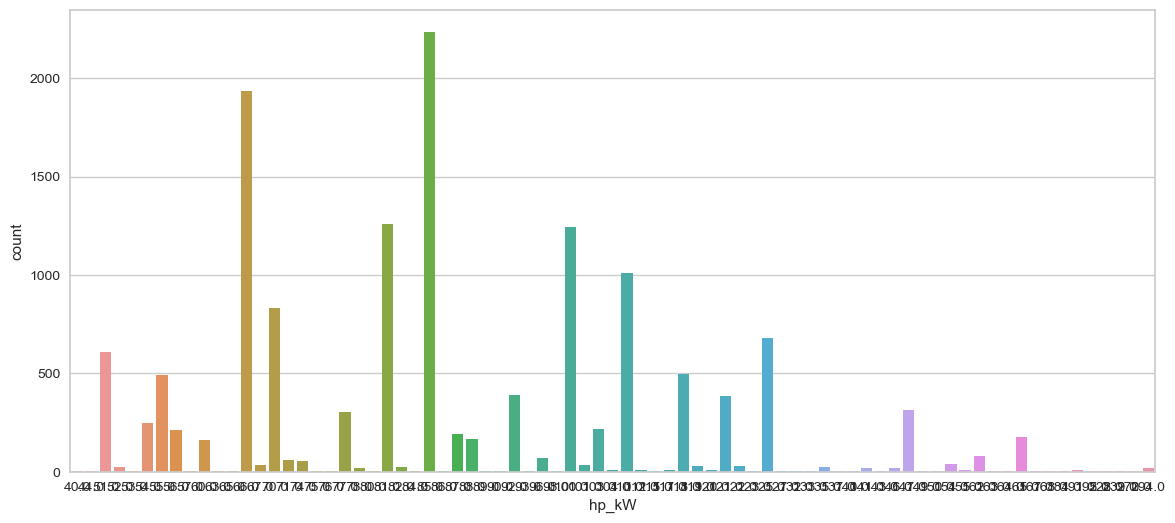

In [47]:
#Seeing the countplot of hp_kW
sns.countplot(x=df["hp_kW"])
plt.show()

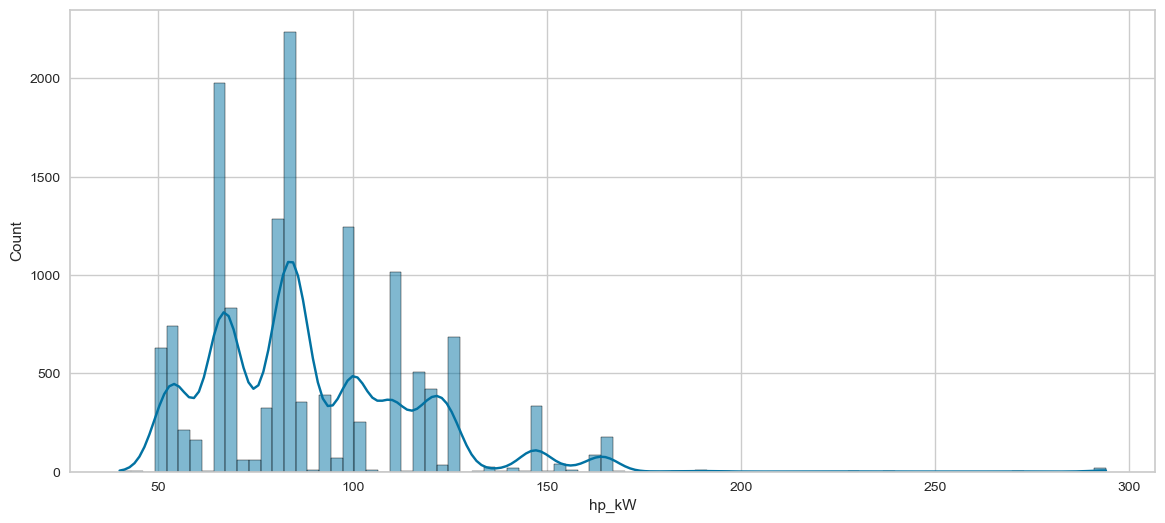

In [48]:
#Seeing the histplot of hp_kW
sns.histplot(df["hp_kW"], kde=True)
plt.show()

### Inspection_new 
       

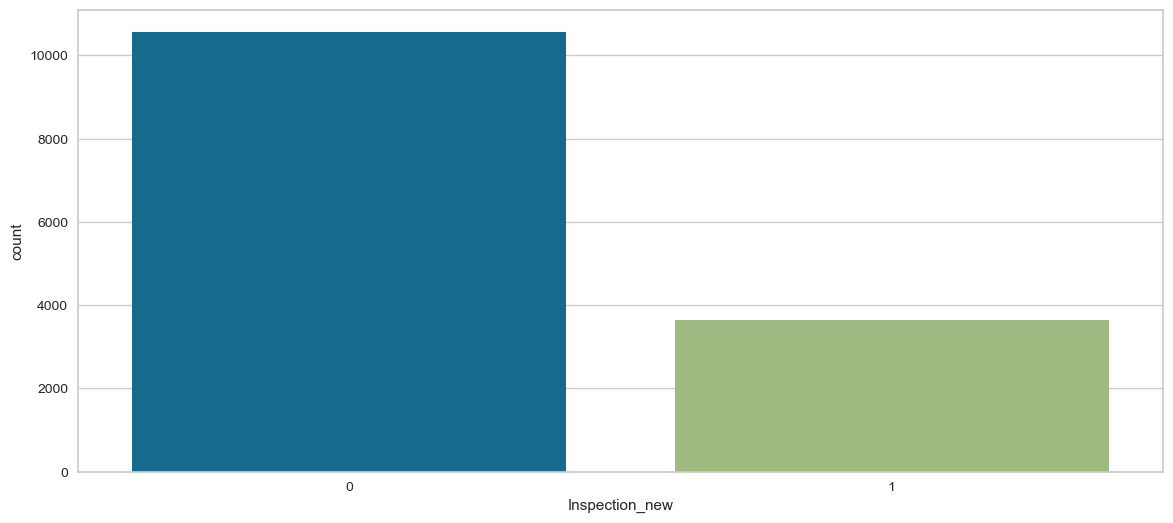

In [49]:
#Seeing the countplot of Inspection_new
sns.countplot(x=df["Inspection_new"])
plt.show()
#As we can see from the graph, there are 2 classes, class 0 is the highest compared to class 1

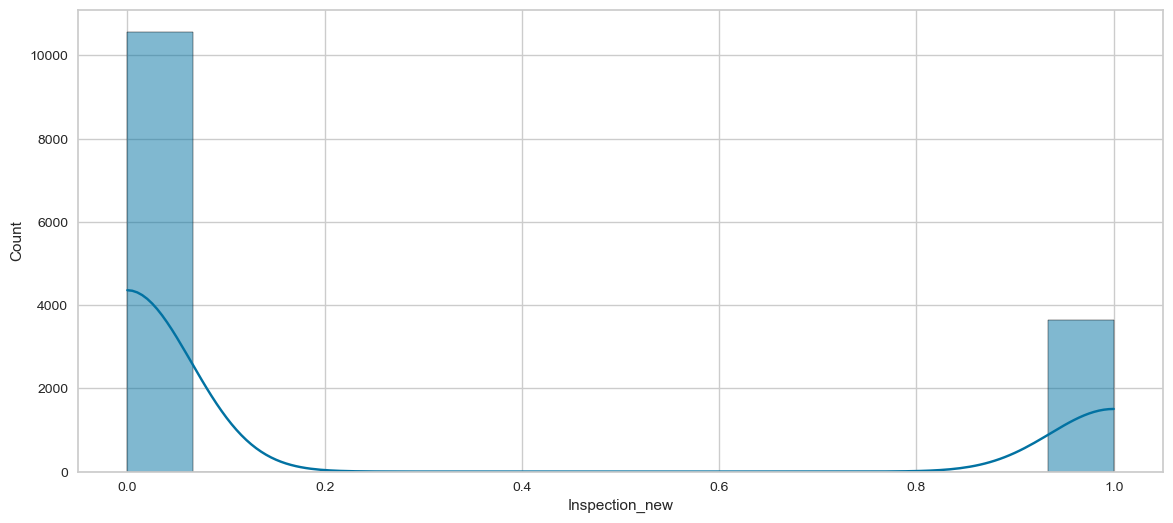

In [50]:
#Seeing the histplot of Inspection_new
sns.histplot(df["Inspection_new"], kde=True)
plt.show()

### Paint_Type 

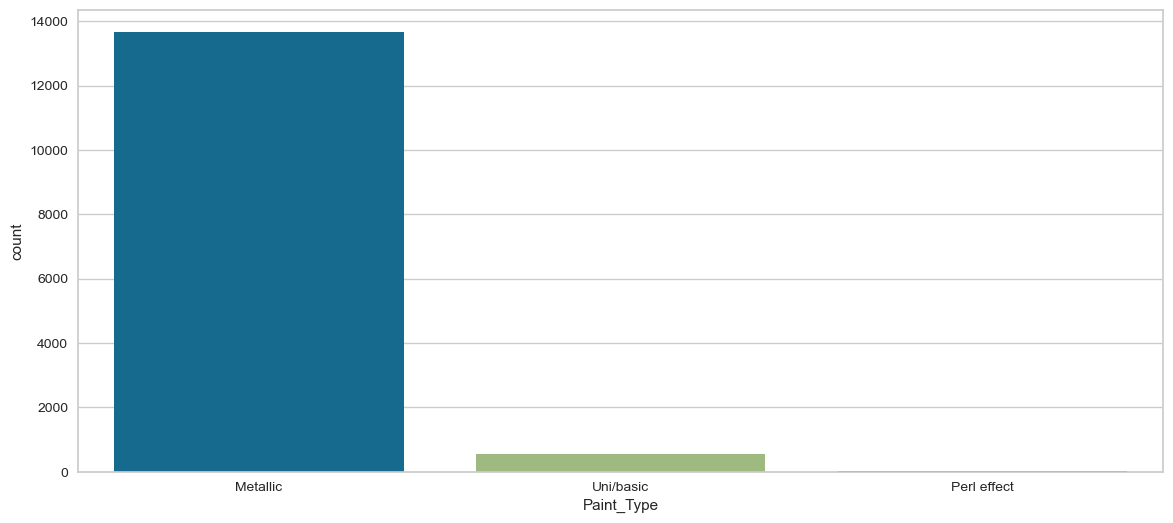

In [51]:
#Seeing the countplot of Paint_Type
sns.countplot(x=df["Paint_Type"])
plt.show()
#As we can see from the graph, there are 3 classes, Metalic has a lot of values but the others have so small values

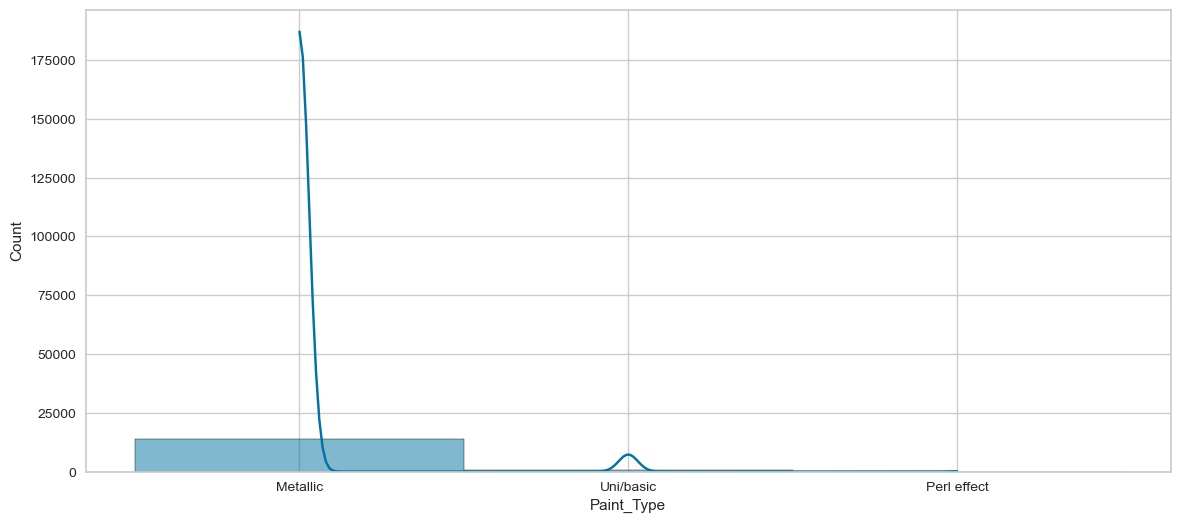

In [52]:
#Seeing the histplot of Paint_Type
sns.histplot(df["Paint_Type"], kde=True)
plt.show()

### Upholstery_type 

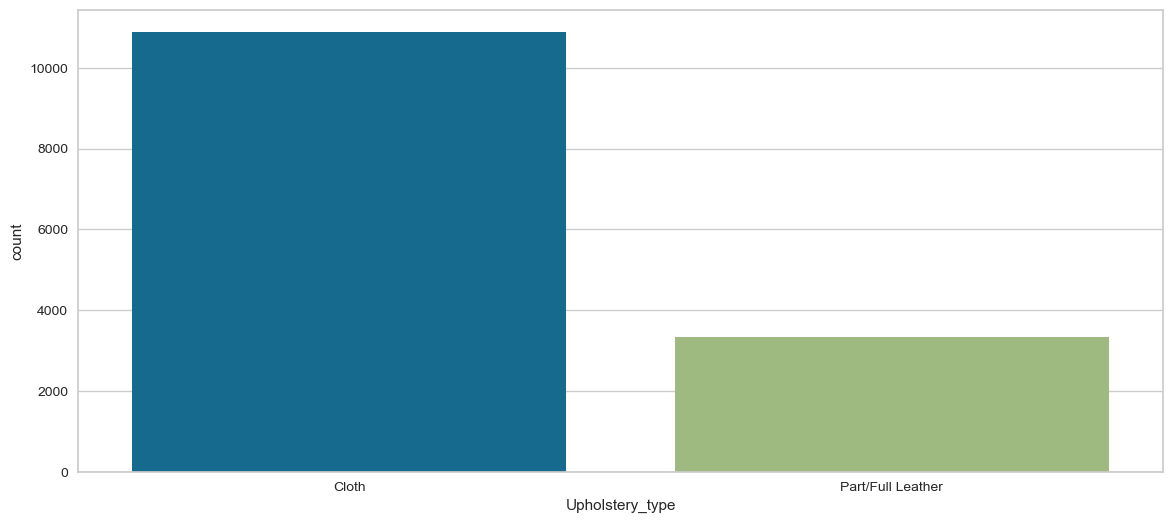

In [53]:
#Seeing the countplot of Upholstery_type
sns.countplot(x=df["Upholstery_type"])
plt.show()
#As we can see from the graph, there are 2 classes, Cloth has a lot of values. which means most of the cars have it

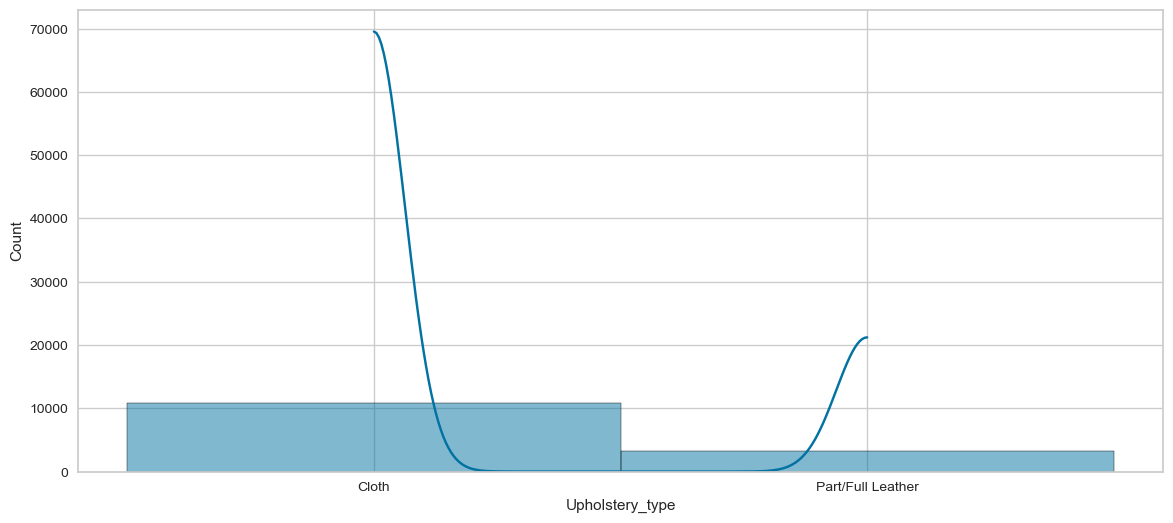

In [54]:
#Seeing the histplot of Upholstery_type
sns.histplot(df["Upholstery_type"], kde=True)
plt.show()

### Gearing_Type 

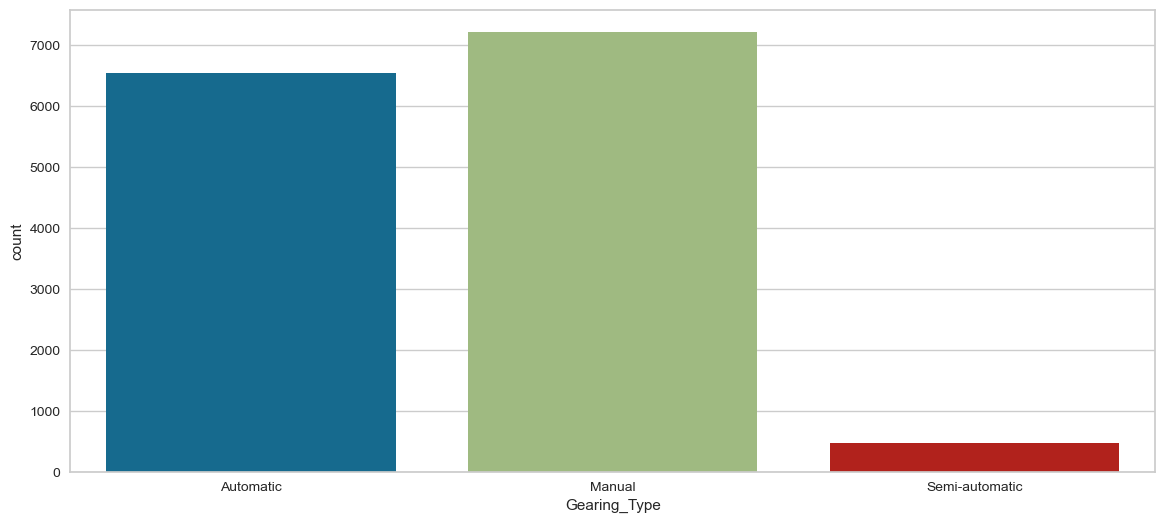

In [55]:
#Seeing the countplot of Gearing_Type
sns.countplot(x=df["Gearing_Type"])
plt.show()
#As we can see from the graph, there are 3 classes, Semi-automatic does not have a lot of values compared with the others

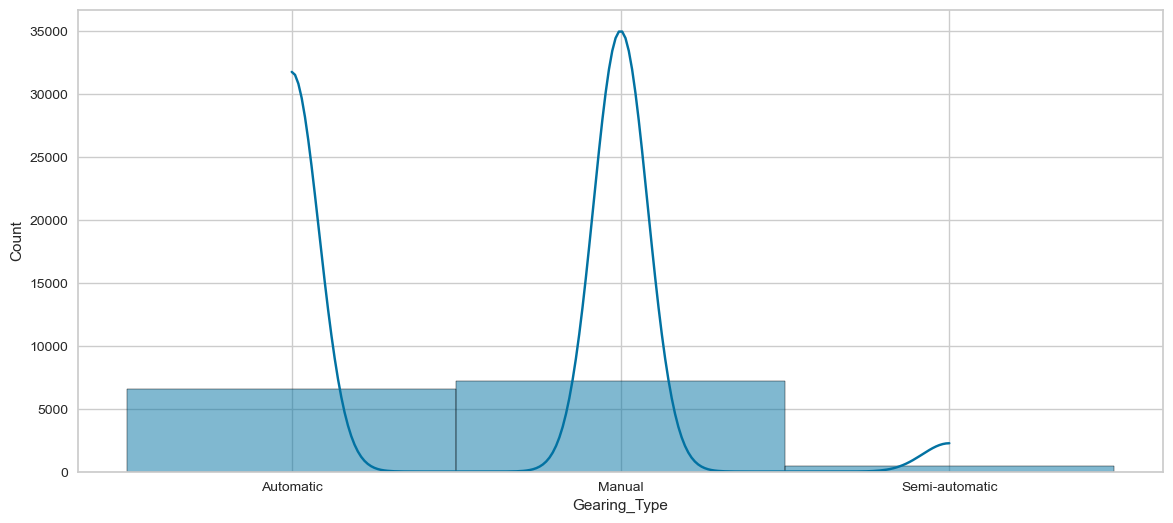

In [56]:
#Seeing the histplot of Gearing_Type
sns.histplot(df["Gearing_Type"], kde=True)
plt.show()

### Displacement_cc
      

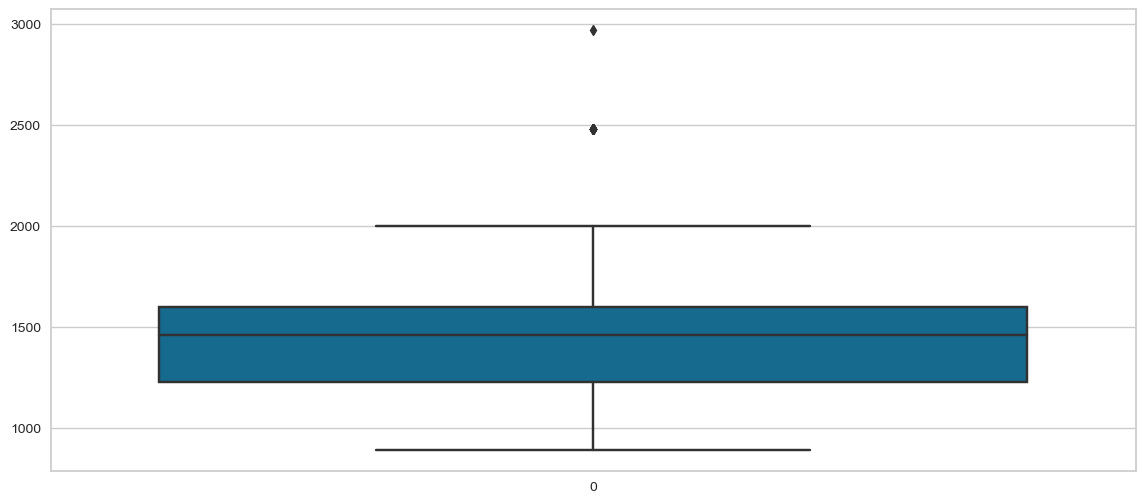

In [57]:
#SEeing teh boxplot of Displacement_cc
sns.boxplot(df['Displacement_cc'])
plt.show()
#As we can see, there are some outliers in Displacement_cc

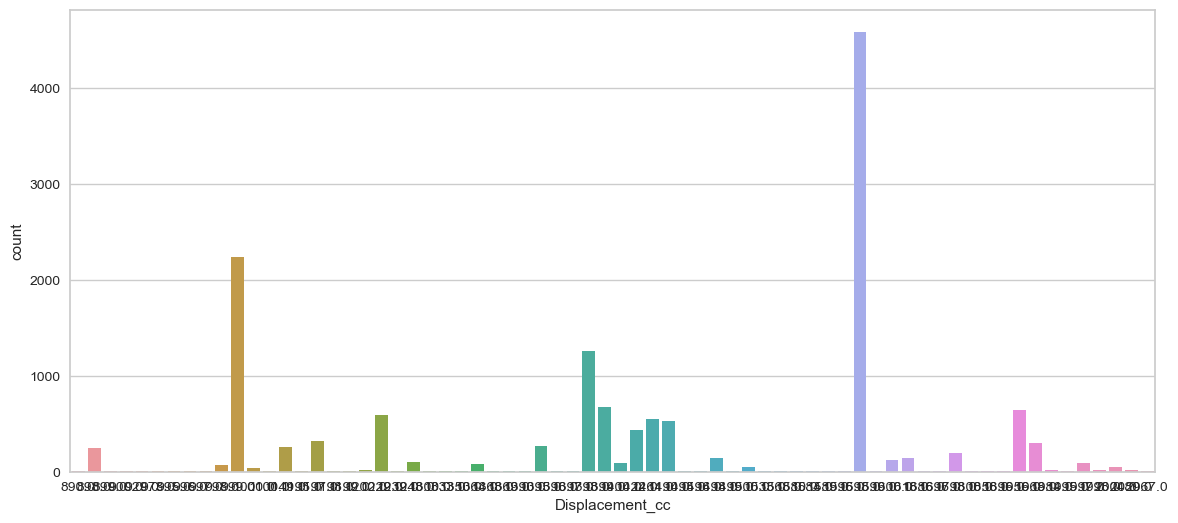

In [58]:
#Seeing the countplot of Displacement_cc
sns.countplot(x=df["Displacement_cc"])
plt.show()

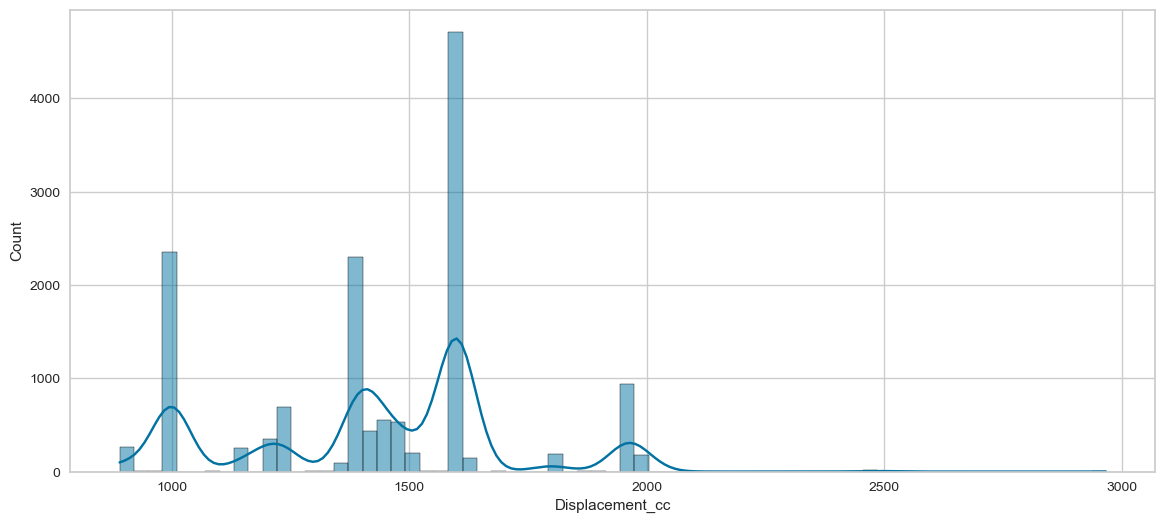

In [59]:
#Seeing the histplot of Displacement_cc
sns.histplot(df["Displacement_cc"], kde=True)
plt.show()

###  Weight_kg 

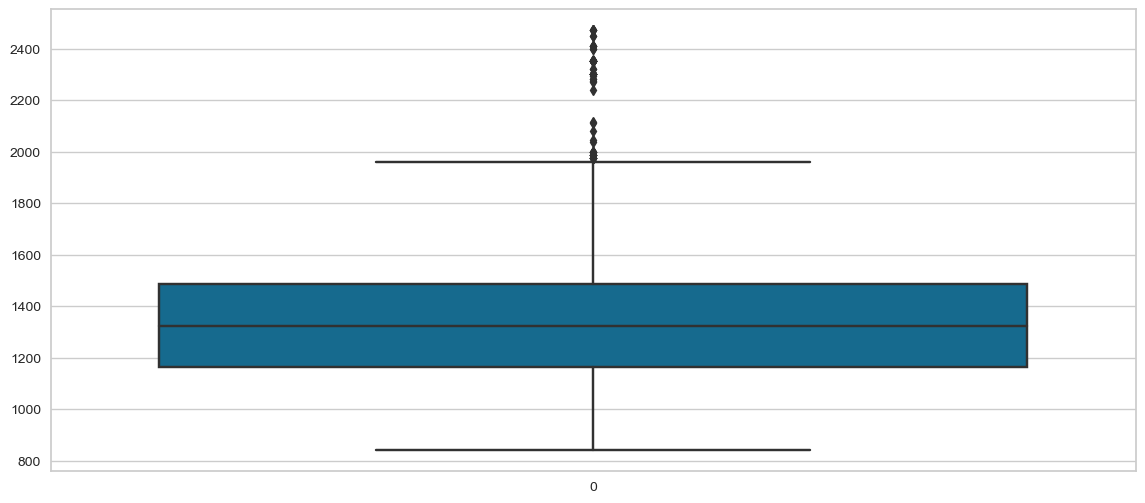

In [60]:
#SEeing teh boxplot of Weight_kg
sns.boxplot(df['Weight_kg'])
plt.show()
#As we can see, there are some outliers in Weight_kg

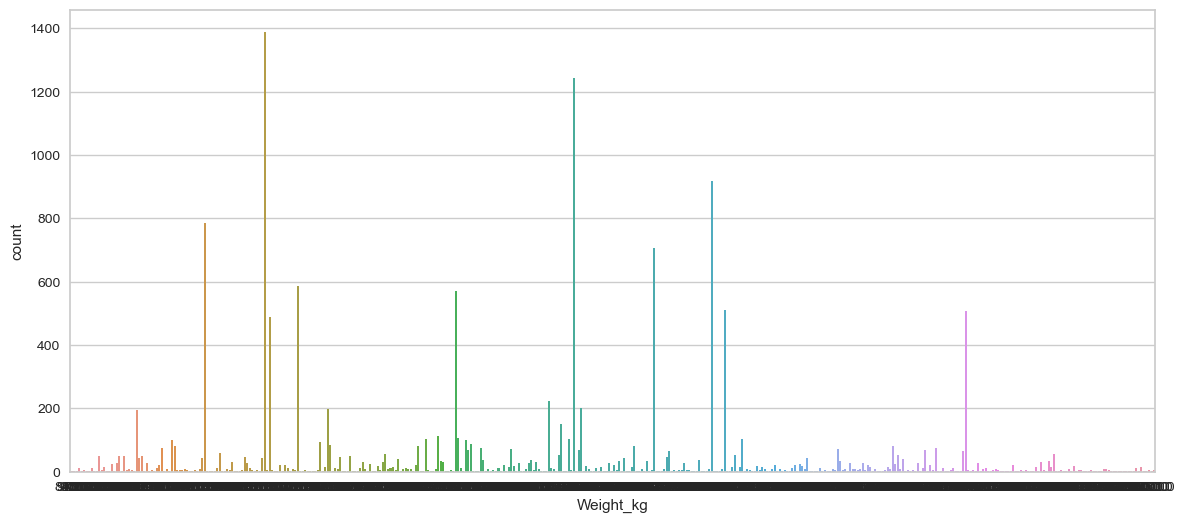

In [61]:
#Seeing the countplot of Weight_kg
sns.countplot(x=df["Weight_kg"])
plt.show()

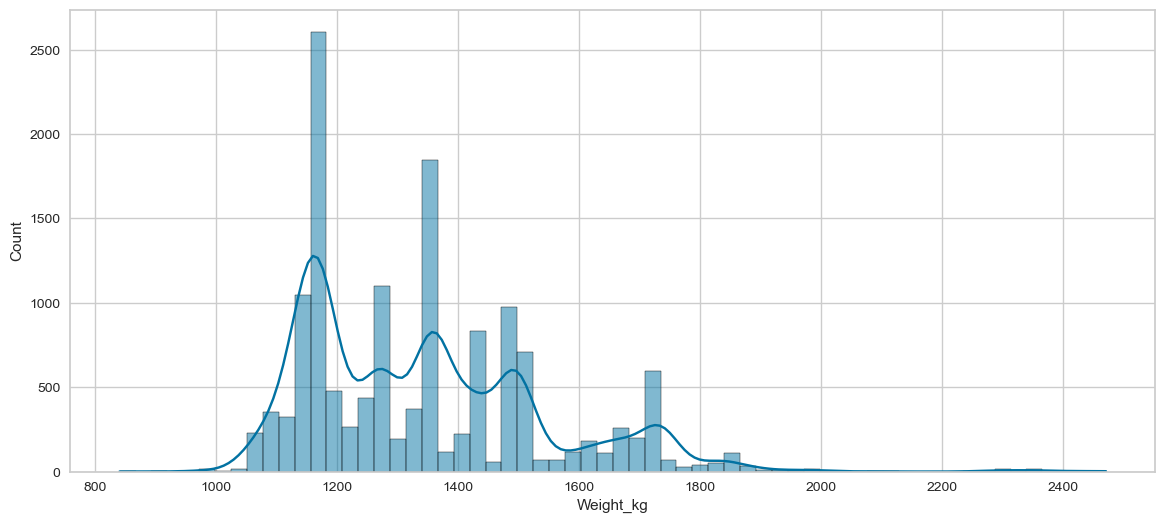

In [62]:
#Seeing the histplot of Weight_kg
sns.histplot(df["Weight_kg"], kde=True)
plt.show()
#As we can see, most of the values are located between 1000 and 1700

### Drive_chain 

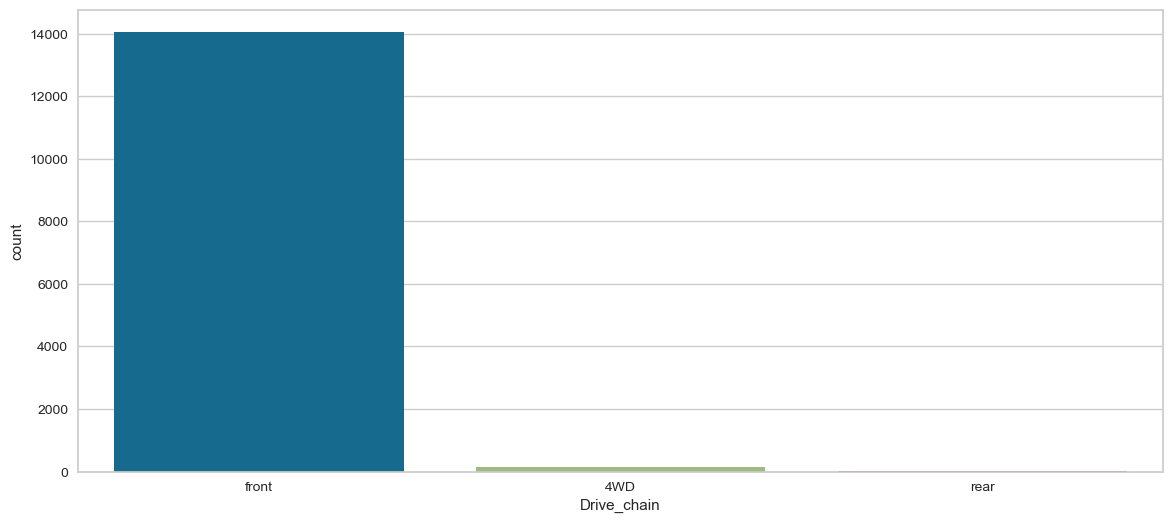

In [63]:
#Seeing the countplot of Drive_chain
sns.countplot(x=df["Drive_chain"])
plt.show()
#As we can see from the graph, there are 3 classes, front has a lot of values, but the others have only tiny values

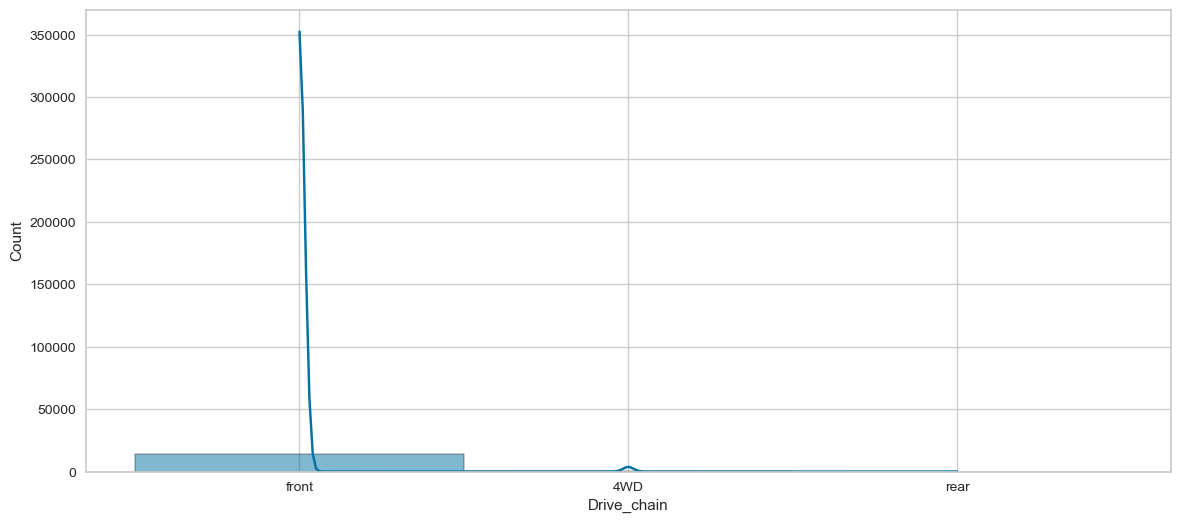

In [64]:
#Seeing the histplot of Drive_chain
sns.histplot(df["Drive_chain"], kde=True)
plt.show()

### cons_comb

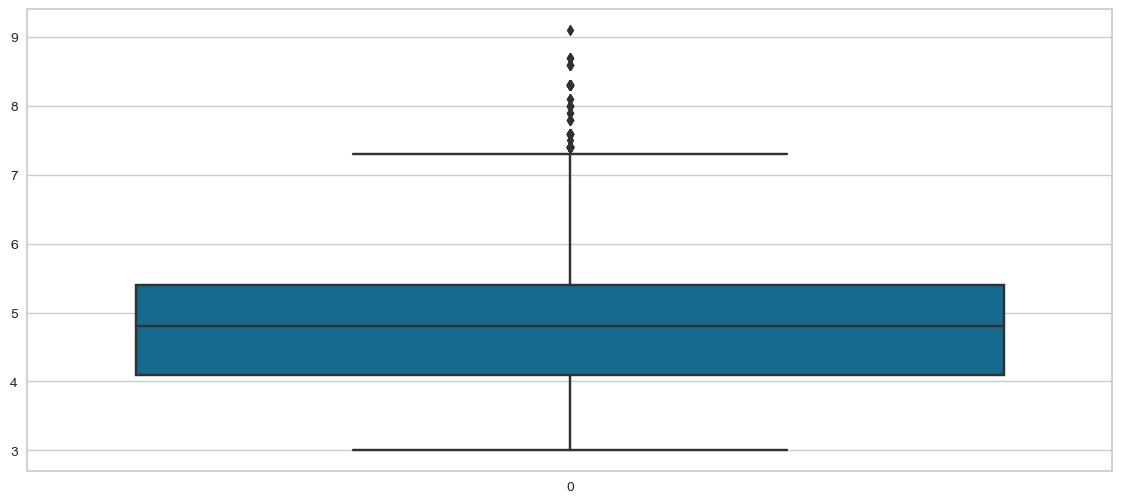

In [65]:
#SEeing teh boxplot of cons_comb
sns.boxplot(df['cons_comb'])
plt.show()
#As we can see, there are some outliers in cons_comb

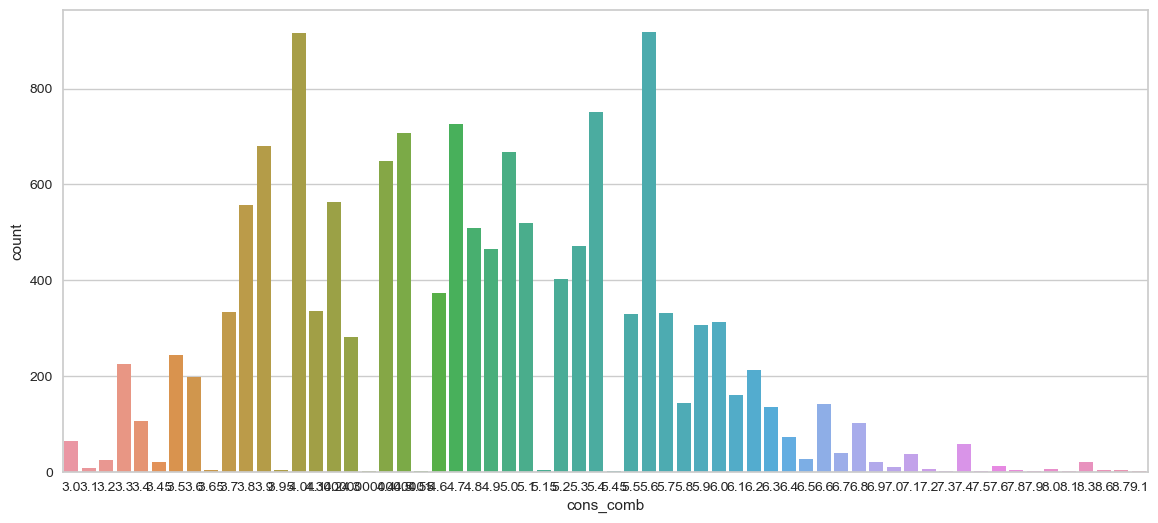

In [66]:
#Seeing the countplot of cons_comb
sns.countplot(x=df["cons_comb"])
plt.show()

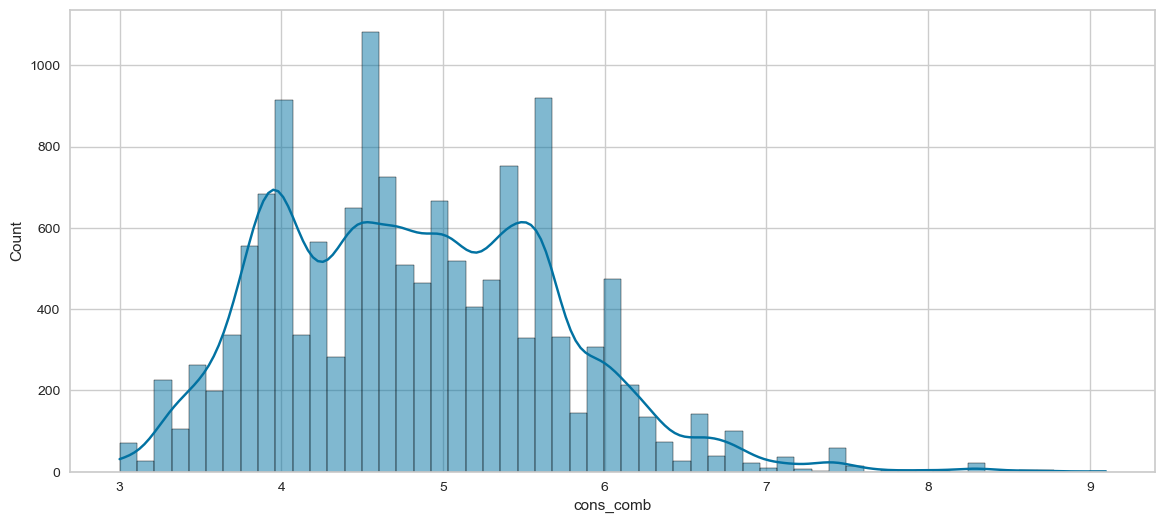

In [67]:
#Seeing the histplot of cons_comb
sns.histplot(df["cons_comb"], kde=True)
plt.show()

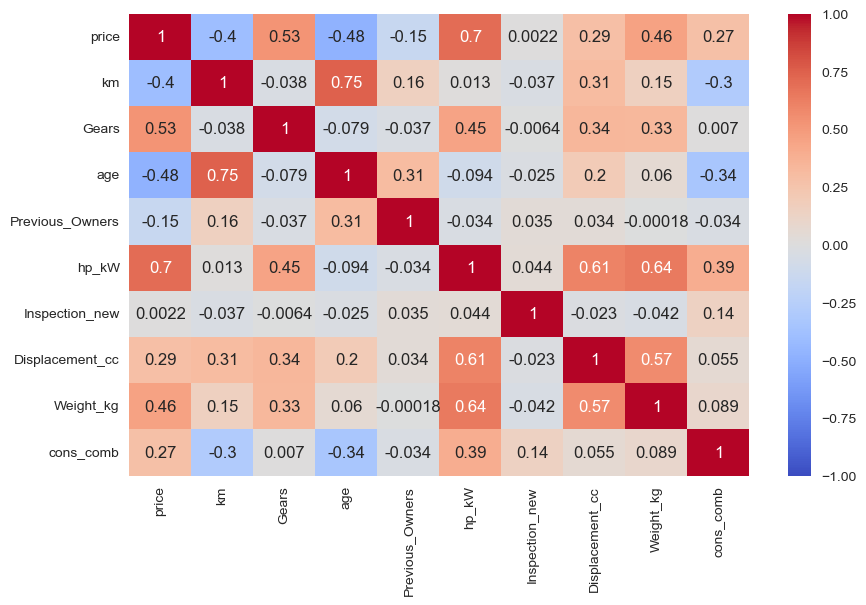

In [68]:
#Seeing the correlation 
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm");
#As we can see, there is not correlation here

In [69]:
#Seeing the multicollinearity
df.corr(numeric_only=True)[(abs(df.corr(numeric_only=True))>= 0.9) & (abs(df.corr(numeric_only=True)) < 1)].any().any()
#As we can see, we do not have multicollinearity

False

## Feature Engineering

In [70]:
#Seeing the head of the data 
df.head()
#Well, from the EDA, i can not see vat as a important feature, so i am going to drop it. The reason for this is that 
#this may affect our target which is the price, so in my opinio, dropping it is better

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [71]:
#Dropping vat from the dataset
df.drop(columns=["vat"], inplace=True)

In [72]:
#Seeing the head of the dataset after dropping vat
df.head()
#As we can see, we do not have vat column now

,make_model,body_type,price,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [73]:
#Seeing the object columns in the dataset and assignt it to a variable
df_ob = df.select_dtypes(include ="object").head()
df_ob
#As we can see, there are a lot of object columns in the dataset

,make_model,body_type,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front


### Comfort_Convenience

In [74]:
#Seeing Comfort_Convenience 
df.Comfort_Convenience.sample(5)
#As we can see, we do have many things in it, and the best way is separite them from the comma, as there is different thing
#after each comma

2321    Air conditioning,Automatic climate control,Cru...
7715    Air conditioning,Cruise control,Electrically h...
174     Air conditioning,Armrest,Automatic climate con...
2550    Air conditioning,Armrest,Automatic climate con...
411     Air conditioning,Electrically heated windshiel...
Name: Comfort_Convenience, dtype: object

In [75]:
#Converting Comfort_Convenience from object to numeric
df["Comfort_Convenience"] = df.Comfort_Convenience.apply(lambda x: len(x.split(',')))

In [76]:
#Seeing Comfort_Convenience after converting
df["Comfort_Convenience"]
#As we can see, now it is numeric not object

0        16
1         9
2        13
3        16
4        13
         ..
14216    27
14217    20
14218    26
14219    23
14220    24
Name: Comfort_Convenience, Length: 14221, dtype: int64

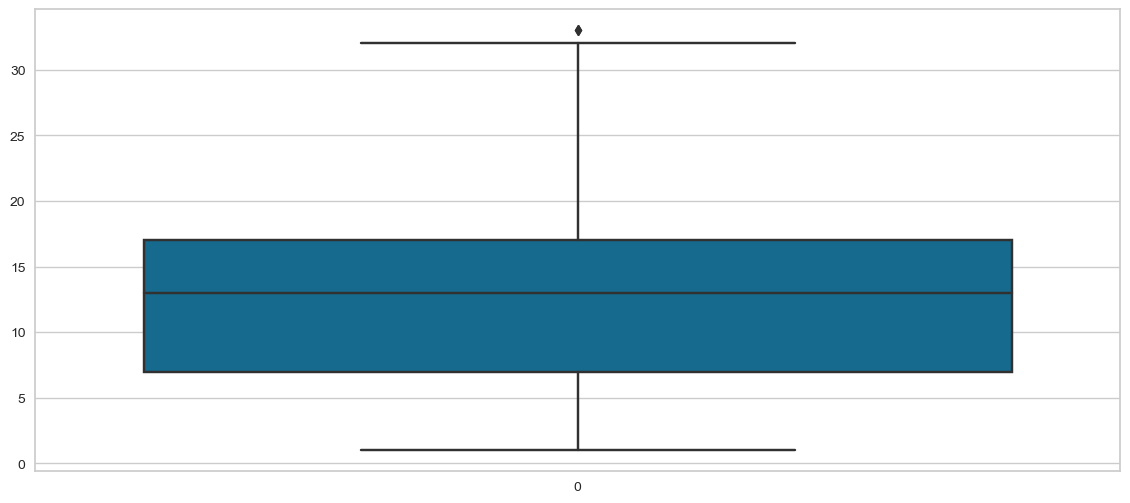

In [77]:
#SEeing teh boxplot of Comfort_Convenience
sns.boxplot(df['Comfort_Convenience'])
plt.show()
#As we can see, there are some outliers in Comfort_Convenience.

In [78]:
#Seeing the value counts of Comfort_Convenience
df.Comfort_Convenience.value_counts()

Comfort_Convenience
15    1011
17     973
14     960
16     846
13     787
4      778
11     731
6      714
12     690
10     676
7      650
5      621
18     578
8      566
3      552
9      495
19     436
21     389
20     366
23     301
22     291
2      230
1      168
24     126
25     105
26      80
27      44
28      31
29      14
31       4
30       4
32       2
33       2
Name: count, dtype: int64

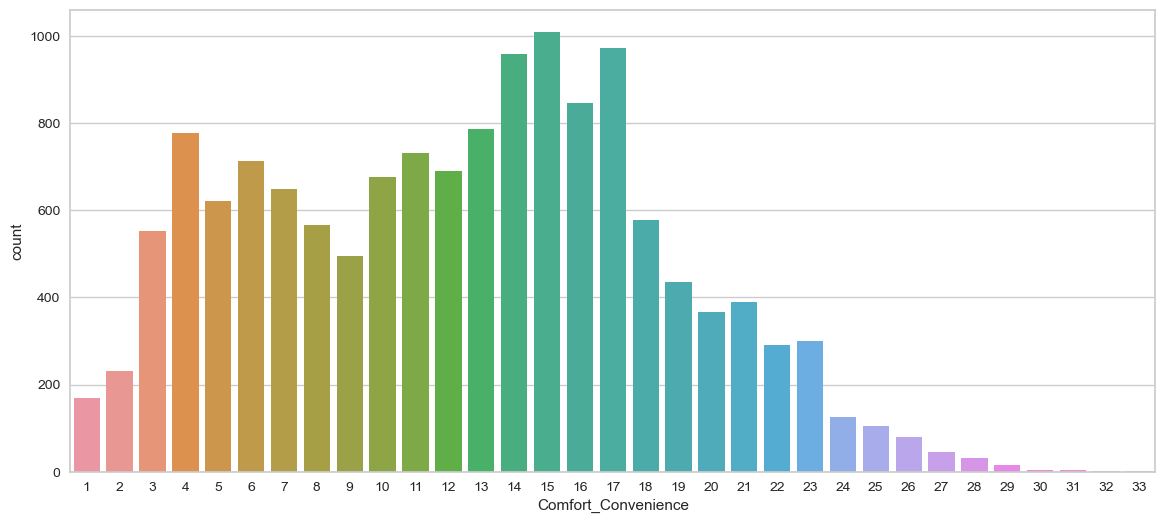

In [79]:
#Seeing the countplot of Comfort_Convenience
sns.countplot(x=df["Comfort_Convenience"])
plt.show()
#As we can see from the graph, there are about 33 ones in Comfort_Convenience, however, from nearly 24, the numbers
#started to decrease.

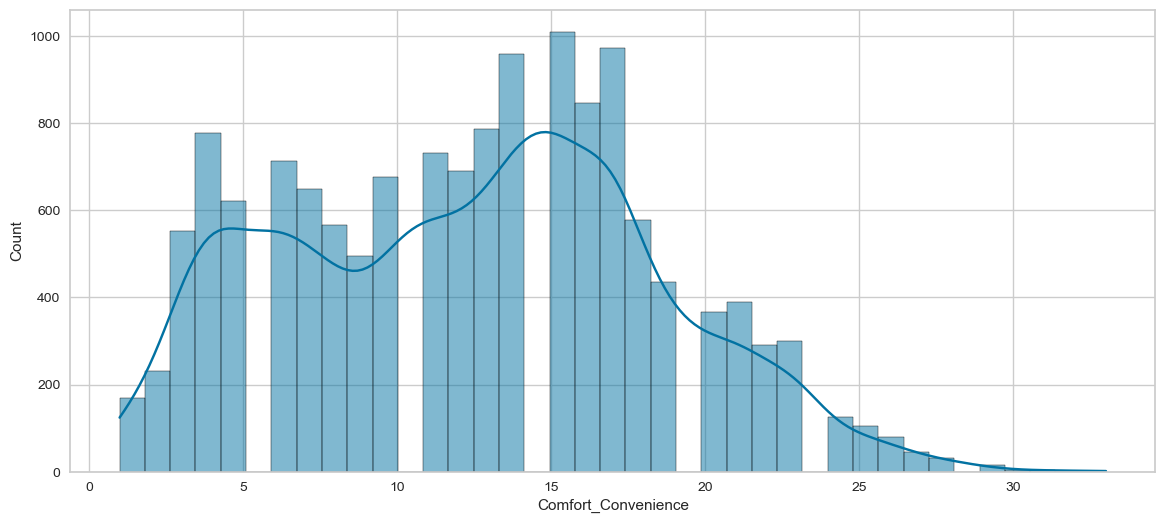

In [80]:
#Seeing the histplot of Comfort_Convenience
sns.histplot(df["Comfort_Convenience"], kde=True)
plt.show()
#As we can see, there are low values from about 24

### Entertainment_Media

In [81]:
#Seeing Entertainment_Media 
df.Entertainment_Media.sample(5)
#As we can see, we do have many things in it, and the best way is separite them from the comma, as there is different thing
#after each comma

10586    Bluetooth,CD player,Hands-free equipment,MP3,O...
12075    Bluetooth,CD player,Hands-free equipment,MP3,O...
6561     Bluetooth,Hands-free equipment,MP3,On-board co...
11748    Bluetooth,Hands-free equipment,On-board comput...
198      Bluetooth,CD player,Hands-free equipment,MP3,O...
Name: Entertainment_Media, dtype: object

In [82]:
#Converting Entertainment_Media from object to numeric
df["Entertainment_Media"] = df.Entertainment_Media.apply(lambda x: len(x.split(',')))

In [83]:
#Seeing Entertainment_Media after converting
df["Entertainment_Media"]
#As we can see, now it is numeric not object

0        4
1        5
2        2
3        8
4        7
        ..
14216    7
14217    6
14218    7
14219    5
14220    4
Name: Entertainment_Media, Length: 14221, dtype: int64

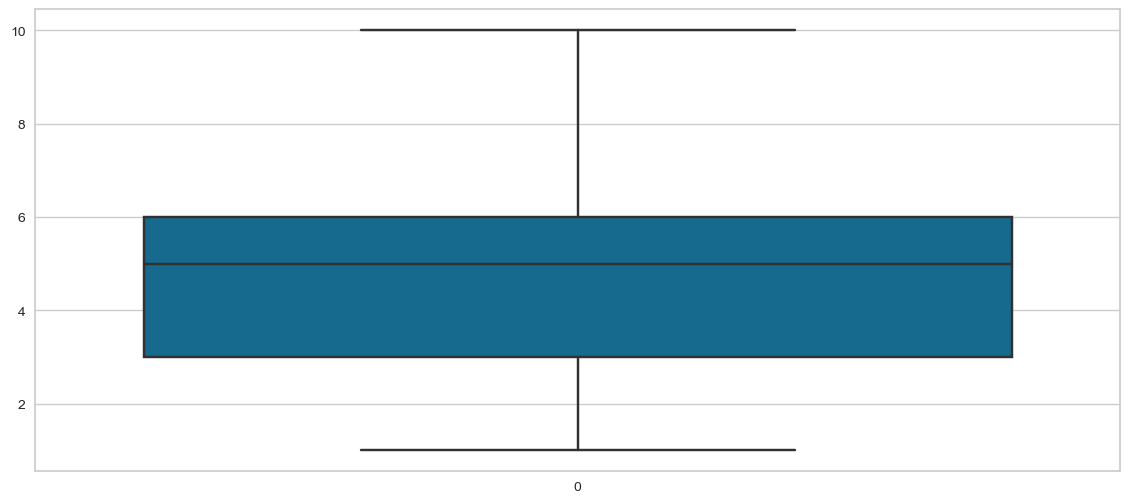

In [84]:
#SEeing teh boxplot of Entertainment_Media
sns.boxplot(df['Entertainment_Media'])
plt.show()
#As we can see, there is no outliers in Entertainment_Media

In [85]:
#Seeing the value counts of Entertainment_Media
df.Entertainment_Media.value_counts()

Entertainment_Media
5     3187
6     2805
7     1756
4     1648
3     1411
2     1337
1     1222
8      670
9      171
10      14
Name: count, dtype: int64

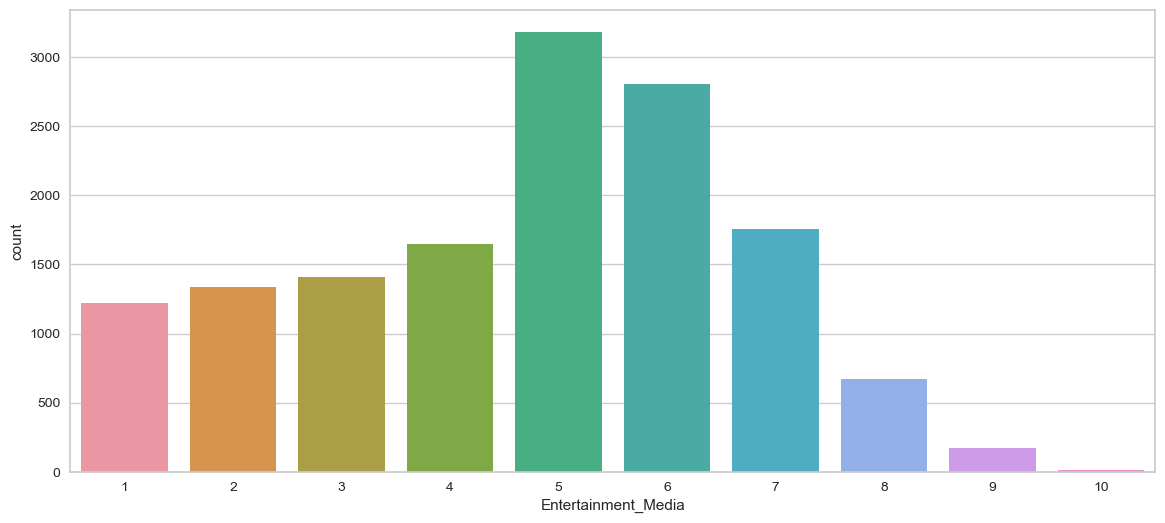

In [86]:
#Seeing the countplot of Entertainment_Media
sns.countplot(x=df["Entertainment_Media"])
plt.show()
#As we can see from the graph, there are 10 values, and 9 and 10 are the lest ones.

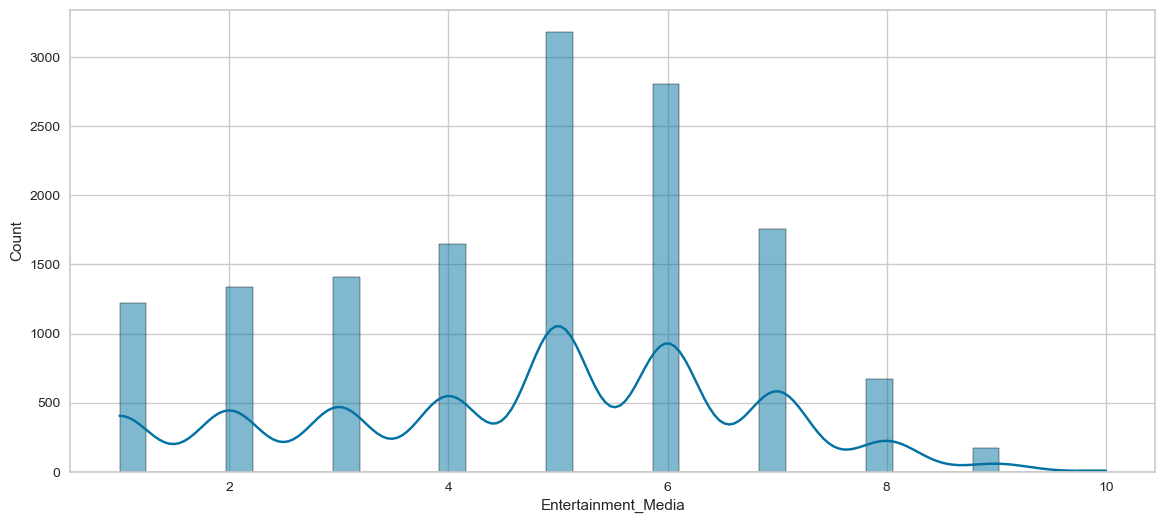

In [87]:
#Seeing the histplot of Entertainment_Media
sns.histplot(df["Entertainment_Media"], kde=True)
plt.show()
#As we can see, there are low values in 9 and 10

### Extras

In [88]:
#Seeing Extras 
df.Extras.sample(5)
#As we can see, we do have many things in it, and the best way is separite them from the comma, as there is different thing
#after each comma

10065                              Roof rack,Trailer hitch
1300     Alloy wheels,Catalytic Converter,Sport package...
8466         Alloy wheels,Catalytic Converter,Touch screen
6353        Alloy wheels,Catalytic Converter,Voice Control
623                                           Alloy wheels
Name: Extras, dtype: object

In [89]:
#Converting Extras from object to numeric
df["Extras"] = df.Extras.apply(lambda x: len(x.split(',')))

In [90]:
#Seeing Extras after converting
df["Extras"]
#As we can see, now it is numeric not object

0        3
1        4
2        2
3        3
4        4
        ..
14216    3
14217    2
14218    5
14219    3
14220    1
Name: Extras, Length: 14221, dtype: int64

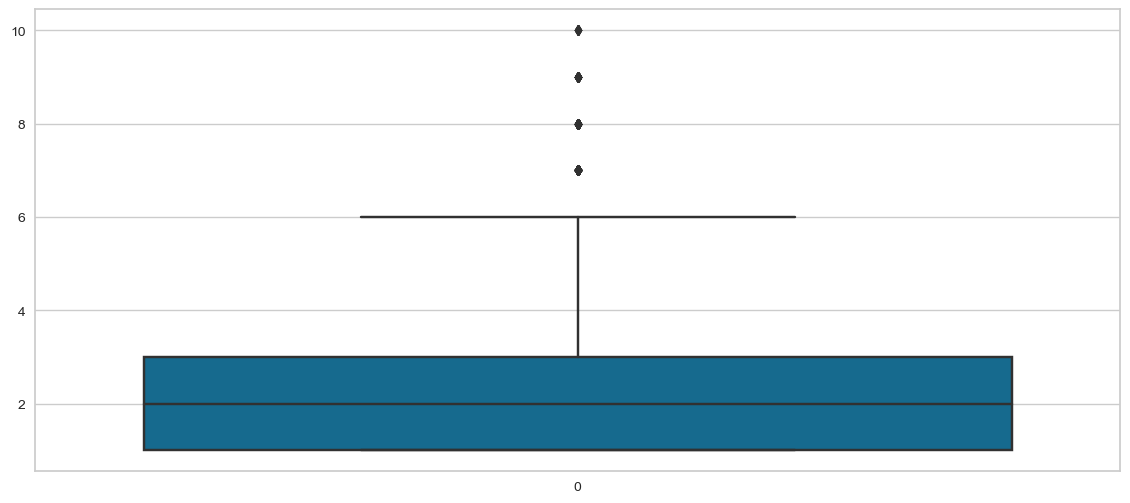

In [91]:
#SEeing teh boxplot of Extras
sns.boxplot(df['Extras'])
plt.show()
#As we can see, there are some outliers in Extras.

In [92]:
#Seeing the value counts of Extras
df.Extras.value_counts()

Extras
1     6079
2     3069
3     2398
4     1341
5      721
6      380
7      139
8       59
9       28
10       7
Name: count, dtype: int64

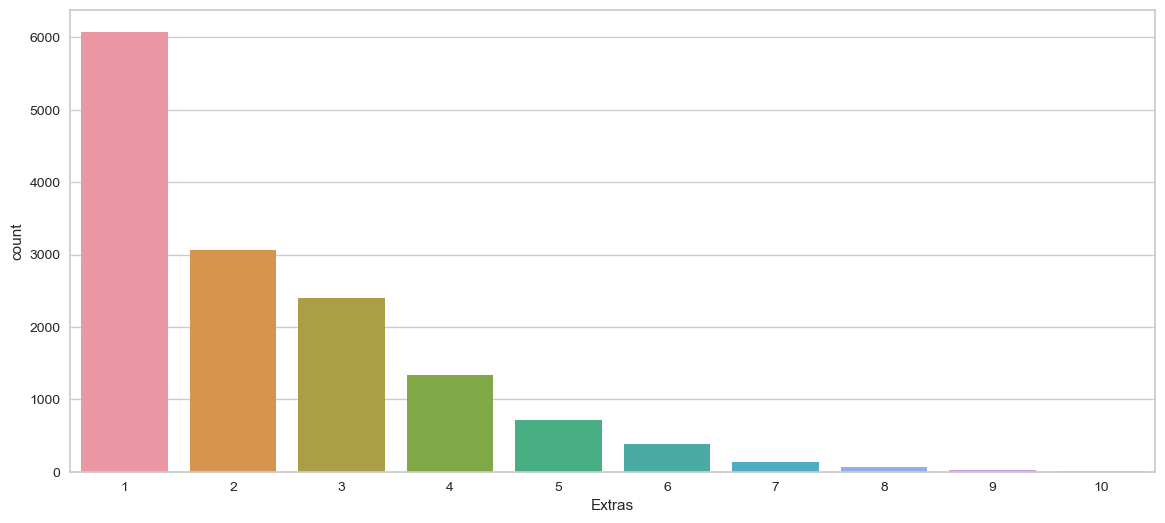

In [93]:
#Seeing the countplot of Extras
sns.countplot(x=df["Extras"])
plt.show()
#As we can see from the graph, there are 10 values, but 1, 2, 3 and 4 are the highest compared to the others

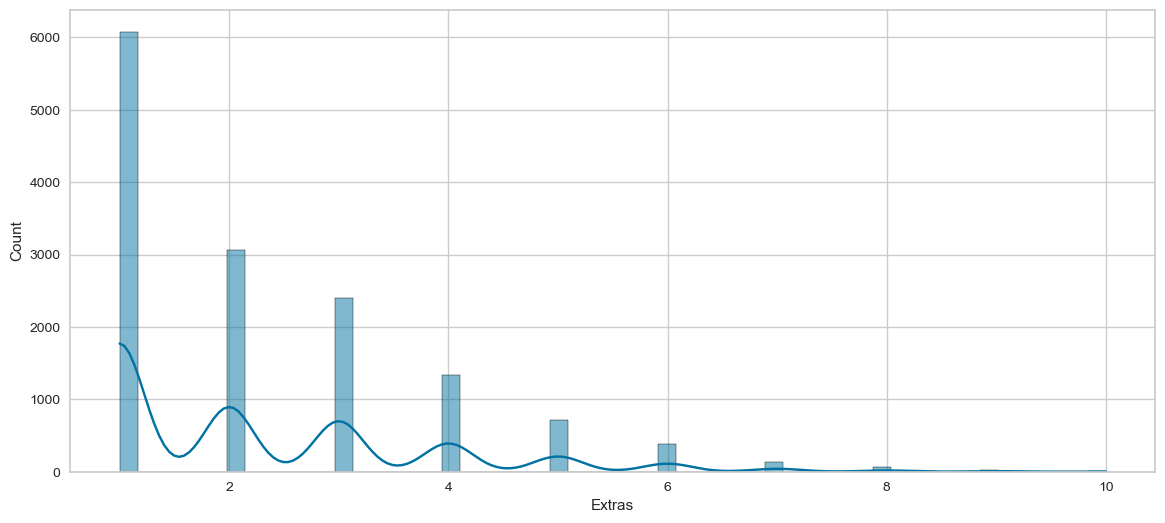

In [94]:
#Seeing the histplot of Extras
sns.histplot(df["Extras"], kde=True)
plt.show()
#As we can see, we can see the same here again the last classes have small values

### Safety_Security

In [95]:
#Seeing Safety_Security 
df.Safety_Security.sample(5)
#As we can see, we do have many things in it, and the best way is separite them from the comma, as there is different thing
#after each comma

4487     ABS,Central door lock,Daytime running lights,D...
4041     ABS,Adaptive headlights,Central door lock,Driv...
13814    ABS,Central door lock,Driver-side airbag,Elect...
6384     ABS,Central door lock,Daytime running lights,D...
399      ABS,Central door lock,Daytime running lights,D...
Name: Safety_Security, dtype: object

In [96]:
#Converting Safety_Security from object to numeric
df["Safety_Security"] = df.Safety_Security.apply(lambda x: len(x.split(',')))

In [97]:
#Seeing Safety_Security after converting
df["Safety_Security"]
#As we can see, now it is numeric not object

0        14
1        15
2        12
3        14
4        13
         ..
14216    18
14217    19
14218    19
14219    19
14220    18
Name: Safety_Security, Length: 14221, dtype: int64

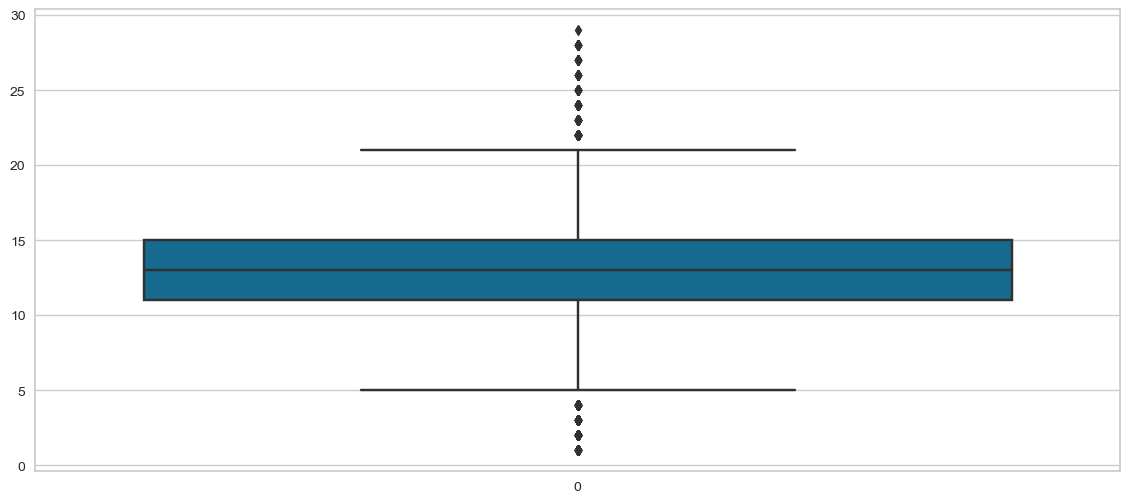

In [98]:
#SEeing teh boxplot of Safety_Security
sns.boxplot(df['Safety_Security'])
plt.show()
#As we can see, there are some outliers in Safety_Security.

In [99]:
#Seeing the value counts of Safety_Security
df.Safety_Security.value_counts()

Safety_Security
13    2201
14    1548
12    1540
11    1301
15     950
10     929
16     806
9      744
18     601
17     553
8      515
19     476
7      426
20     372
6      297
21     237
5      193
22     115
2       95
3       70
4       66
1       53
23      45
24      38
25      16
28      14
26      10
27       9
29       1
Name: count, dtype: int64

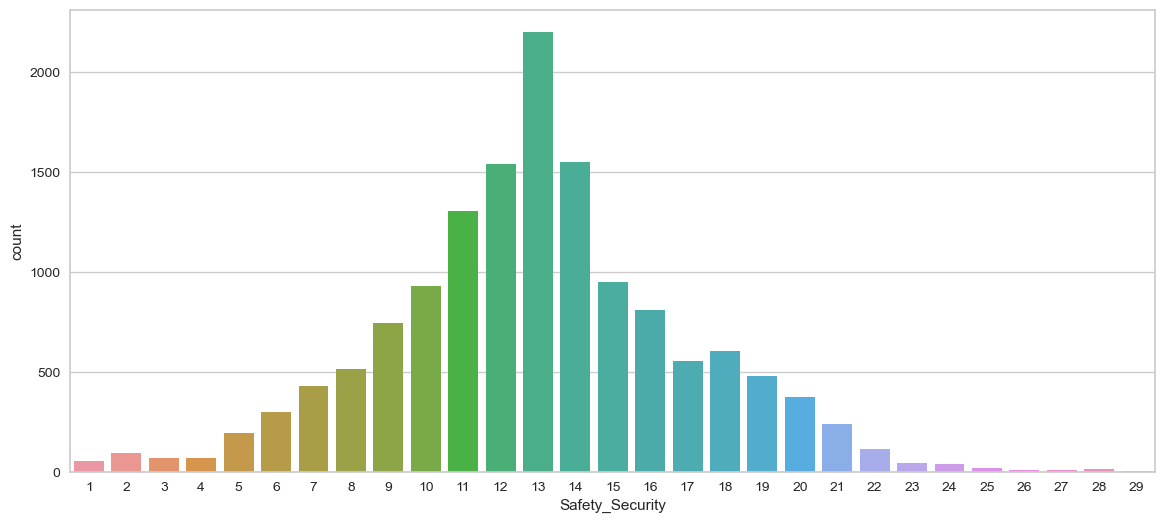

In [100]:
#Seeing the countplot of Safety_Security
sns.countplot(x=df["Safety_Security"])
plt.show()
#As we can see from the graph, there are about 29 classes adn 13 is the highest

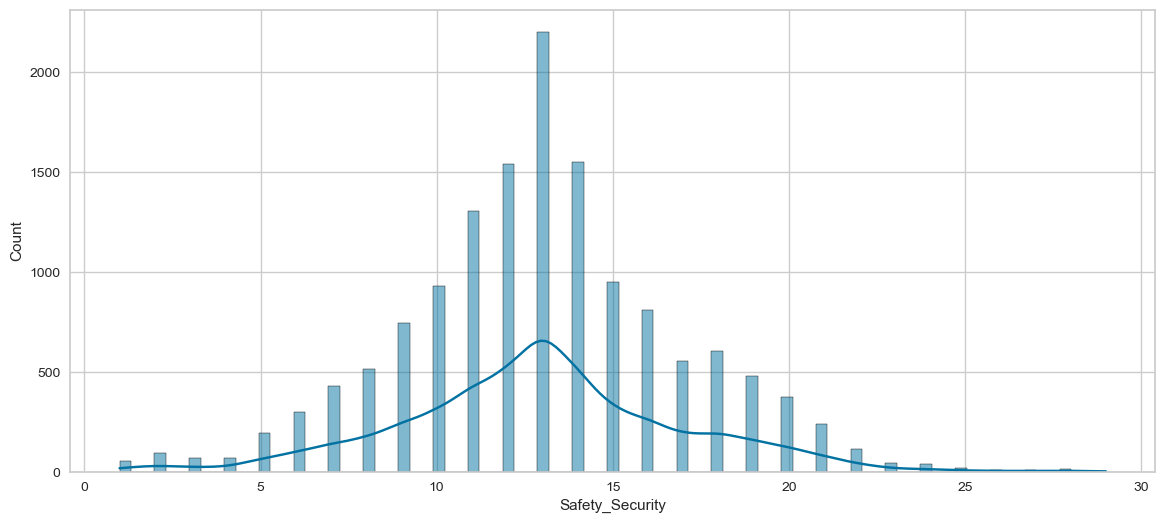

In [101]:
#Seeing the histplot of Safety_Security
sns.histplot(df["Safety_Security"], kde=True)
plt.show()

In [102]:
#Let's the dataset after converting
df.head()
#As we can see, they have converted successfuly

,make_model,body_type,price,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,56013.000,Used,Diesel,7.000,16,4,3,14,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,80000.000,Used,Benzine,7.000,9,5,4,15,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,83450.000,Used,Diesel,7.000,13,2,2,12,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,73000.000,Used,Diesel,6.000,16,8,3,14,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,16200.000,Used,Diesel,7.000,13,7,4,13,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [103]:
#Seeing the object columns in the dataset and assignt it to a variable
df_ob2 = df.select_dtypes(include ="object").head()
df_ob2
#As we can see, now we can see that the numbers are decreased after converting

,make_model,body_type,Type,Fuel,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,Used,Diesel,Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Used,Benzine,Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,Used,Diesel,Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,Used,Diesel,Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,Used,Diesel,Metallic,Cloth,Automatic,front


In [104]:
#Dropping the prices that more than 50000
df = df[(df.price < 50000)]
df

,make_model,body_type,price,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,56013.000,Used,Diesel,7.000,16,4,3,14,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,80000.000,Used,Benzine,7.000,9,5,4,15,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,83450.000,Used,Diesel,7.000,13,2,2,12,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,73000.000,Used,Diesel,6.000,16,8,3,14,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,16200.000,Used,Diesel,7.000,13,7,4,13,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14216,Renault Espace,Van,39980,100.000,Pre-registered,Diesel,6.000,27,7,3,18,0.000,1.000,118.000,0,Metallic,Part/Full Leather,Automatic,1598.000,1734.000,front,4.700
14217,Renault Espace,Van,39950,1647.363,New,Diesel,6.000,20,6,2,19,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300
14218,Renault Espace,Van,39950,1000.000,Demonstration,Benzine,6.000,26,7,5,19,0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1734.000,front,6.800
14219,Renault Espace,Van,39885,9900.000,Used,Benzine,7.000,23,5,3,19,0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400


In [105]:
#Seeing the prices after filtering
df.price

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
14216    39980
14217    39950
14218    39950
14219    39885
14220    39875
Name: price, Length: 14178, dtype: int64

In [106]:
#Seeing the sum of prices that are more than 50000
(df.price > 50000).sum()

0

In [107]:
#Seeing the prices that less than 50000
(df.price < 50000).sum()

14178

## Modeling

### Train | Test Split

In [108]:
#Splitting the data to X and y
X= df.drop(columns="price")
y= df.price

In [109]:
#Seeing the head of X
X.head()

,make_model,body_type,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,56013.000,Used,Diesel,7.000,16,4,3,14,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,80000.000,Used,Benzine,7.000,9,5,4,15,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,83450.000,Used,Diesel,7.000,13,2,2,12,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,73000.000,Used,Diesel,6.000,16,8,3,14,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16200.000,Used,Diesel,7.000,13,7,4,13,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [110]:
#seeing the head of y
y.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [111]:
#Seeing the shape of X and y
print('X shape is:', X.shape)
print('y shape is:', y.shape)

X shape is: (14178, 21)
y shape is: (14178,)


In [112]:
#Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t, random_state=s)

In [113]:
#Seeing the shape of X_train and X_test
print('X_train, shape is:', X_train.shape)
print('X_test shape is:', X_test.shape)


#Seeing the shape of y_train and y_test
print('y_train, shape is:', y_train.shape)
print('y_test shape is:', y_test.shape)

X_train, shape is: (11342, 21)
X_test shape is: (2836, 21)
y_train, shape is: (11342,)
y_test shape is: (2836,)


In [114]:
#Seeing the head of X_train
X_train.head()

,make_model,body_type,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
1219,Audi A1,Compact,10007.000,Used,Benzine,5.000,16,6,2,14,2.000,1.000,70.000,1,Metallic,Cloth,Manual,999.000,1180.000,front,4.400
5094,Audi A3,Sedans,201.000,Used,Diesel,6.000,13,3,1,9,0.000,1.000,85.000,0,Metallic,Cloth,Manual,1598.000,1333.000,front,4.100
8843,Opel Corsa,Compact,13488.000,Employee's car,Benzine,5.000,8,4,2,15,1.000,1.000,66.000,0,Metallic,Cloth,Manual,1398.000,1163.000,front,5.100
7558,Opel Corsa,Sedans,20420.000,Used,Benzine,5.000,17,6,4,14,1.000,1.000,66.000,1,Metallic,Cloth,Automatic,1398.000,1163.000,front,4.700
9896,Opel Insignia,Station wagon,138170.000,Used,Diesel,6.000,17,4,2,16,3.000,1.000,100.000,0,Metallic,Part/Full Leather,Manual,1598.000,1564.000,front,4.300


In [115]:
#Seeing the head of X_test
X_test.head()

,make_model,body_type,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2315,Audi A1,Sedans,5000.000,Used,Benzine,5.000,9,3,1,8,0.000,1.000,60.000,0,Metallic,Cloth,Manual,999.000,1625.000,front,4.200
9114,Opel Corsa,Compact,10.000,Pre-registered,Benzine,6.000,16,5,3,15,0.000,1.000,66.000,1,Metallic,Cloth,Automatic,1398.000,1163.000,front,6.200
5187,Opel Astra,Station wagon,38900.000,Used,Diesel,6.000,19,5,2,14,2.000,1.000,100.000,1,Metallic,Part/Full Leather,Automatic,1598.000,1425.000,front,4.500
3206,Audi A3,Sedans,31000.000,Used,Diesel,6.000,17,7,6,22,3.000,1.000,81.000,0,Metallic,Cloth,Manual,1598.000,1280.000,front,3.400
9814,Opel Insignia,Station wagon,152000.000,Used,Diesel,6.000,15,6,5,15,3.000,2.000,100.000,0,Metallic,Cloth,Automatic,1598.000,1701.000,front,5.000


In [116]:
#Seeing the head of y_train
y_train.head()

1219    15590
5094    25470
8843     9940
7558    12890
9896    14990
Name: price, dtype: int64

In [117]:
#Seeing the head of y_test
y_test.head()

2315    22390
9114    15975
5187    15980
3206    15999
9814     9900
Name: price, dtype: int64

In [118]:
#Seeing the object classes in the data set
df.select_dtypes(include="object").head(1)

,make_model,body_type,Type,Fuel,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,Used,Diesel,Metallic,Cloth,Automatic,front


In [119]:
df.Type.value_counts()

Type
Used              10140
New                1345
Pre-registered     1029
Employee's car      904
Demonstration       760
Name: count, dtype: int64

In [120]:
#Making a variable for the columns that i will use in OneHotEncoder
c_onehot = ['make_model', 'body_type', 'Fuel', 'Upholstery_type', 'Gearing_Type', 'Drive_chain', 'Paint_Type']

#Making a variable for the columns that i will use in OrdinalEncoder
c_ord = ['Type']

#Making the values of Type
c_type = ["Used", "New", "Pre-registered", "Employee's car", "Demonstration"]

In [121]:
#Converting the object values to numeric values by OneHot and Ordinal Endoder
trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), c_onehot),
                        (OrdinalEncoder(categories= [c_type]),c_ord),
                         remainder='passthrough',
                         verbose_feature_names_out=False)

trans = trans.set_output(transform="pandas")

In [122]:
#Seeing the head of X_train
X_train.head()

,make_model,body_type,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
1219,Audi A1,Compact,10007.000,Used,Benzine,5.000,16,6,2,14,2.000,1.000,70.000,1,Metallic,Cloth,Manual,999.000,1180.000,front,4.400
5094,Audi A3,Sedans,201.000,Used,Diesel,6.000,13,3,1,9,0.000,1.000,85.000,0,Metallic,Cloth,Manual,1598.000,1333.000,front,4.100
8843,Opel Corsa,Compact,13488.000,Employee's car,Benzine,5.000,8,4,2,15,1.000,1.000,66.000,0,Metallic,Cloth,Manual,1398.000,1163.000,front,5.100
7558,Opel Corsa,Sedans,20420.000,Used,Benzine,5.000,17,6,4,14,1.000,1.000,66.000,1,Metallic,Cloth,Automatic,1398.000,1163.000,front,4.700
9896,Opel Insignia,Station wagon,138170.000,Used,Diesel,6.000,17,4,2,16,3.000,1.000,100.000,0,Metallic,Part/Full Leather,Manual,1598.000,1564.000,front,4.300


In [123]:
#Fitting the trans with X_train
trans.fit_transform(X_train).head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Type,km,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
1219,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,10007.000,5.000,16,6,2,14,2.000,1.000,70.000,1,999.000,1180.000,4.400
5094,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,201.000,6.000,13,3,1,9,0.000,1.000,85.000,0,1598.000,1333.000,4.100
8843,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,3.000,13488.000,5.000,8,4,2,15,1.000,1.000,66.000,0,1398.000,1163.000,5.100
7558,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,20420.000,5.000,17,6,4,14,1.000,1.000,66.000,1,1398.000,1163.000,4.700
9896,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,138170.000,6.000,17,4,2,16,3.000,1.000,100.000,0,1598.000,1564.000,4.300


In [124]:
#Fitting the trans with X_train
X_train_trans = trans.fit_transform(X_train)

#Fitting the trans with X_test
X_test_trans = trans.transform(X_test)

In [125]:
#Seeing the shape of X_train_trans and X_test_trans
X_train_trans.shape, X_test_trans.shape 

((11342, 44), (2836, 44))

In [126]:
#Seeing the head of X_train_trans
X_train_trans.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Type,km,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
1219,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,10007.000,5.000,16,6,2,14,2.000,1.000,70.000,1,999.000,1180.000,4.400
5094,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,201.000,6.000,13,3,1,9,0.000,1.000,85.000,0,1598.000,1333.000,4.100
8843,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,3.000,13488.000,5.000,8,4,2,15,1.000,1.000,66.000,0,1398.000,1163.000,5.100
7558,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,20420.000,5.000,17,6,4,14,1.000,1.000,66.000,1,1398.000,1163.000,4.700
9896,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,138170.000,6.000,17,4,2,16,3.000,1.000,100.000,0,1598.000,1564.000,4.300


In [127]:
#Seeing the head of X_test_trans
X_test_trans.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Type,km,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
2315,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,5000.000,5.000,9,3,1,8,0.000,1.000,60.000,0,999.000,1625.000,4.200
9114,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,2.000,10.000,6.000,16,5,3,15,0.000,1.000,66.000,1,1398.000,1163.000,6.200
5187,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,38900.000,6.000,19,5,2,14,2.000,1.000,100.000,1,1598.000,1425.000,4.500
3206,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,31000.000,6.000,17,7,6,22,3.000,1.000,81.000,0,1598.000,1280.000,3.400
9814,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,152000.000,6.000,15,6,5,15,3.000,2.000,100.000,0,1598.000,1701.000,5.000


In [128]:
# X_train_trans.join(y_train).corr()

#### Scaling

In [169]:
#Creating a scaler
scaler = MinMaxScaler().set_output(transform="pandas")
#Fitting the scaler with X_train_trans
scaler.fit(X_train_trans)

#transforming X_train_trans
X_train_scaled = scaler.transform(X_train_trans)

#transforming X_test_trans
X_test_scaled = scaler.transform(X_test_trans)

In [130]:
#Seeing the head of X_train_scaled
X_train_scaled.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Type,km,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
1219,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.032,0.000,0.469,0.556,0.111,0.464,0.667,0.250,0.118,1.000,0.052,0.208,0.230
5094,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.001,0.333,0.375,0.222,0.000,0.286,0.000,0.250,0.177,0.000,0.341,0.302,0.180
8843,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.750,0.043,0.000,0.219,0.333,0.111,0.500,0.333,0.250,0.102,0.000,0.245,0.198,0.344
7558,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.064,0.000,0.500,0.556,0.333,0.464,0.333,0.250,0.102,1.000,0.245,0.198,0.279
9896,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.436,0.333,0.500,0.333,0.111,0.536,1.000,0.250,0.236,0.000,0.341,0.444,0.213


In [131]:
#Seeing the head of X_test_scaled
X_test_scaled.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Type,km,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
2315,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.016,0.000,0.250,0.222,0.000,0.250,0.000,0.250,0.079,0.000,0.052,0.481,0.197
9114,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.500,0.000,0.333,0.469,0.444,0.222,0.500,0.000,0.250,0.102,1.000,0.245,0.198,0.525
5187,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.123,0.333,0.562,0.444,0.111,0.464,0.667,0.250,0.236,1.000,0.341,0.359,0.246
3206,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.098,0.333,0.500,0.667,0.556,0.750,1.000,0.250,0.161,0.000,0.341,0.270,0.066
9814,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.479,0.333,0.438,0.556,0.444,0.500,1.000,0.500,0.236,0.000,0.341,0.528,0.328


#### Eval Function

In [132]:
#Creating the eval function to see the metrics
# Pre-defined functions

def eval(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided.

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)


# Adjusted R2 Score
def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


### LinearRegression Model

In [133]:
#Creaing LinearRegression model
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

LinearRegression()

In [134]:
#Seeing the evaluation of the model
eval(linear, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.863,0.866
mae,1874.652,1843.371
mse,6949926.976,6709326.557
rmse,2636.271,2590.237


In [136]:
y_pred = linear.predict(X_test_scaled)
y_pred

array([18496., 17120., 16968., ..., 28328., 15832., 22912.])

In [137]:
adj_r2(y_test, y_pred, X_test_scaled)

0.8634384564734643

In [140]:
scoring = ['r2','neg_mean_absolute_error', 'neg_mean_squared_error','neg_root_mean_squared_error']

In [141]:
#Creating crossvalidation
model = LinearRegression()

lin_scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
#Creating a dataframe
pd.DataFrame(lin_scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.030,0.010,0.870,0.862,-1855.569,-1874.808,-6861586.178,-6959381.244,-2619.463,-2638.064
1,0.036,0.008,0.858,0.864,-1932.115,-1865.730,-7260528.351,-6923919.192,-2694.537,-2631.334
2,0.033,0.013,0.862,0.863,-1881.212,-1873.966,-7096327.626,-6934876.838,-2663.893,-2633.415
3,0.033,0.008,0.858,0.864,-1859.979,-1878.435,-6726388.833,-6974285.721,-2593.528,-2640.887
4,0.020,0.010,0.870,0.862,-1853.668,-1880.125,-6330951.302,-7018272.365,-2516.138,-2649.202
5,0.027,0.007,0.864,0.863,-1836.340,-1874.939,-6684268.169,-6980703.969,-2585.395,-2642.102
6,0.024,0.008,-12646413855441942528.000,0.863,-1038039528414.907,-1878.736,-610957275299760371843203072.000,-7000976.845,-24717549945327.520,-2645.936
7,0.024,0.015,0.860,0.864,-1924.904,-1867.698,-7270147.235,-6916598.534,-2696.321,-2629.943
8,0.024,0.006,0.846,0.865,-1933.738,-1860.979,-8388437.191,-6790932.464,-2896.280,-2605.942
9,0.024,0.010,0.863,0.863,-1881.428,-1866.993,-7104537.020,-6933512.334,-2665.434,-2633.156


In [142]:
#Seeing the mean of the scores
pd.DataFrame(lin_scores).iloc[:, 2:].mean()

test_r2                                    -1264641385544194304.000
train_r2                                                      0.863
test_neg_mean_absolute_error                      -103803954537.386
train_neg_mean_absolute_error                             -1872.241
test_neg_mean_squared_error         -61095727529976040620294144.000
train_neg_mean_squared_error                           -6943345.950
test_neg_root_mean_squared_error                 -2471754996925.851
train_neg_root_mean_squared_error                         -2634.998
dtype: float64

In [150]:
params = linear.get_params()
print(params)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [153]:
# Define the parameter grid
param_grid = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'n_jobs': [1, 2, None],
    'positive': [True, False]
}

#Creating the model
linear_model = LinearRegression()

# Create the grid search object
grid_search = GridSearchCV(linear_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [1, 2, None],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [156]:
# Access the best model
best_model = grid_search.best_estimator_
best_model

LinearRegression(fit_intercept=False, n_jobs=1)

In [158]:
# Evaluate the model
y_pred = best_model.predict(X_test_scaled)
y_pred

array([18484.10846769, 17111.46690392, 17032.47229411, ...,
       28360.80319602, 15787.94632077, 22923.0015666 ])

In [159]:
#Creaing LinearRegression model with the parameters from gridSearch
linear_m = LinearRegression(fit_intercept=False, n_jobs=1)
linear_m.fit(X_train_scaled, y_train)

LinearRegression(fit_intercept=False, n_jobs=1)

In [160]:
#Seeing the evaluation of the model
eval(linear_m, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.863,0.866
mae,1872.312,1840.995
mse,6946820.184,6701294.712
rmse,2635.682,2588.686


In [163]:
y_pred = linear_m.predict(X_test_scaled)
y_pred

array([18484.10846769, 17111.46690392, 17032.47229411, ...,
       28360.80319602, 15787.94632077, 22923.0015666 ])

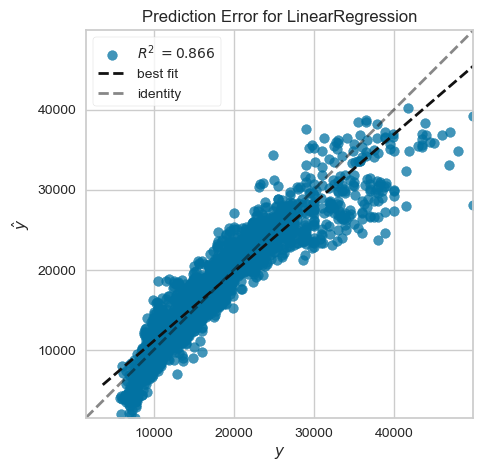

In [164]:
visualizer = RadViz(size=(500, 1000))

visualizer = PredictionError(linear_m)
visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();


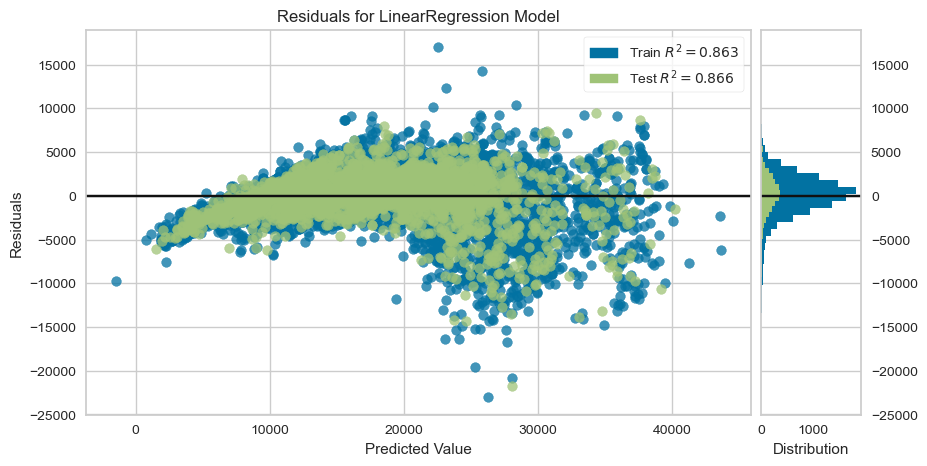

In [166]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
visualizer = ResidualsPlot(linear_m)

visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();

In [167]:
linear_R2 = r2_score(y_test, y_pred)
linear_mae = mean_absolute_error(y_test, y_pred)
linear_rmse = mean_squared_error(y_test, y_pred, squared=False)

In [168]:
print('linear_R2', linear_R2)
print('linear_mae', linear_mae)
print('linear_rmse', linear_rmse)

linear_R2 0.8657188729778669
linear_mae 1840.9945657401797
linear_rmse 2588.6859044604125


### Visually Compare Models Performance In a Graph

In [ ]:
scores = {"linear_m": {"r2_score": lm_R2 ,
 "mae": lm_mae,
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2,
 "mae": rm_mae,
 "rmse": rm_rmse},

 "lasso_m": {"r2_score": lasm_R2,
 "mae": lasm_mae,
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2,
 "mae": em_mae,
 "rmse": em_rmse},

 "final_m": {"r2_score": fm_R2,
 "mae": fm_mae ,
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

In [ ]:
for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False # if our metric is r2_score the barplot will be sorted from largest to smallest
    else:
        ascending = True # if our metric is mae or rmse then barplot will be sorted from smallest to largest
    compare = scores.sort_values(by=j, ascending=ascending) # reorders compare df by corresponding metric
    ax = sns.barplot(x = compare[j] , y= compare.index) # The metric scores of compare[j] are drawn sequentially from compare df
                                                        # and visualized in the barplot.
                                                        # y=compare.index will write the model names on the y-axis of our image.
    ax.bar_label(ax.containers[0], fmt="%.4f");